In [1]:
#Librerías a utilizar durante el análisis
import warnings
import squarify
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import option_context
from matplotlib import pyplot as plt
sns.set_style("dark")
%matplotlib inline
warnings.filterwarnings("ignore")

## RECETAS, INGREDIENTES Y SALUD


Después de haber recolectado y agrupado los diferentes tipos de datos (categáricas y cualitativas) por diferentes metódos. El siguiente análisis se llevará acabo apartir desde los siguientes archivos csv:

- recipes_countries_rates_pre    --> Info acerca de los ratios de presión en la sangre, IMC (Índice de Masa Corporal, Diabetes, entre otras).
- nutrition_by_recipe            --> Valor nutricional por receta categorizada por país.
- ingredientes_by_category_recipe--> Valor nutricional por ingredientes agrupadas por receta.

In [2]:
recipes_countries_rates_pre = pd.read_csv("recipe_country_rates.csv", index_col="Unnamed: 0")
nutrition_by_recipe = pd.read_csv("Nutrition_value_by_recipe.csv", index_col="Unnamed: 0")
ingredientes_by_category_recipe = pd.read_csv("Ingredients_by_category_lat_lon.csv", index_col= "Unnamed: 0")

- El arroz es el ingrediente más usado en las prepaciones de las diferentes cocinas en estudio con respecto al resto de los ingredientes.
- Las cocinas de los países hispanos tienen una alta relación. Es decir, comparten gran porcentaje de ingredientes en sus preparaciones, en que el totame y la cebolla son los más usados.
- Estados Unidos es el páis con mayor media de IMC (Índice de Masa Corporal) y, tiene una correlación positiva con los componentes del valor nutricional de las recetas (Grasas, Colesterol, Sodio, Azúcar, etc.)


Antes de empezar a realizar el análisis, es importante aclarar que el tema princial de dicha exploración de datos. Los diferentes datasets mencionados nos ayudarán a hacer un viaje en las distintas recetas de diferentes partes del mundo para encontrar aquellos ingredientes que los hacen distinguir entre las diferentes cocinas del mundo, como también la relación entre ellas; y por último analizar su vinculo con la salud.

### Exploración inicial

Para el primer dataframe, se puede observar que existen aproximadamente 10.000 NaN values en las columnas de Country (tipo object) Name hasta diabetes prevalence Women. Por otro lado, columnas como Country que se encuentra repetida varias veces, hará parte fundamental en el análisis, al igual que las diferentes columnas de medias como la media de la presión sistólica y diastólica, entre otros,  y que según el método info() estas variables sonde tipo float.

In [3]:
recipes_countries_rates_pre.info()
recipes_countries_rates_pre.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118160 entries, 0 to 118159
Data columns (total 29 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   name                                        118160 non-null  object 
 1   link                                        118160 non-null  object 
 2   Continent                                   118160 non-null  object 
 3   Region                                      118160 non-null  object 
 4   adjective                                   118160 non-null  object 
 5   Country                                     118160 non-null  object 
 6   Country Name                                109349 non-null  object 
 7   Population                                  109349 non-null  float64
 8   Country/Region/World                        109349 non-null  object 
 9   Mean systolic blood pressure (mmHg) Men     109349 non-null  float64
 

,name,link,Continent,Region,adjective,Country,Country Name,Population,Country/Region/World,Mean systolic blood pressure (mmHg) Men,...,Mean BMI (urban-rural difference) Men,Mean BMI (urban-rural difference) Women,Mean total cholesterol (mmol/L) Men,Mean total cholesterol (mmol/L) Women,Mean non-HDL cholesterol (mmol/L) Men,Mean non-HDL cholesterol (mmol/L) Women,Mean HDL cholesterol (mmol/L) Men,Mean HDL cholesterol (mmol/L) Women,diabetes prevalence Men,diabetes prevalence Women
0,Sweet Honey French Bread,https://cosylab.iiitd.edu.in/recipedb/search_r...,European,French,French,France,France,66312067.0,France,127.317829,...,-0.358170,-0.296360,5.117555,5.168397,3.838323,3.630613,1.310025,1.58538,0.074589,0.044255
1,Southwestern Beef Brisket,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentine,Argentina,Argentina,42669500.0,Argentina,128.329290,...,0.961628,0.401727,4.728944,4.724748,3.654045,3.397721,1.069015,1.26926,0.098786,0.094601
2,Crushed Heirloom Potatoes,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentine,Argentina,Argentina,42669500.0,Argentina,128.329290,...,0.961628,0.401727,4.728944,4.724748,3.654045,3.397721,1.069015,1.26926,0.098786,0.094601
3,Heirloom Tomato Salad With Goat Cheese and Aru...,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentine,Argentina,Argentina,42669500.0,Argentina,128.329290,...,0.961628,0.401727,4.728944,4.724748,3.654045,3.397721,1.069015,1.26926,0.098786,0.094601
4,Heirloom Tomato Sandwich With Basil Mayo,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentine,Argentina,Argentina,42669500.0,Argentina,128.329290,...,0.961628,0.401727,4.728944,4.724748,3.654045,3.397721,1.069015,1.26926,0.098786,0.094601


A comparación del anterior, este dataset no contiene NaN values, lo que no deberíamos tener problemas. Por otro lado, existen variables de tipo object, como también int y float. El valor nutricional en las diferentes preparaciones tendría gran importancia al relacionarla con los ratios o los indicadores de salud anteriormente mencionados.

In [4]:
nutrition_by_recipe.info()
nutrition_by_recipe.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121103 entries, 0 to 121102
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Link_page              121103 non-null  object 
 1   Time(min)              121103 non-null  int64  
 2   Serving size(g)        121103 non-null  int64  
 3   Servings per recipe    121103 non-null  int64  
 4   Calories               121103 non-null  float64
 5   Calories from Fat      121103 non-null  float64
 6   Total Fat(g)           121103 non-null  float64
 7   Saturated Fat(g)       121103 non-null  float64
 8   Cholesterol (mg)       121103 non-null  float64
 9   Sodium(mg)             121103 non-null  float64
 10  Total Carbohydrate(g)  121103 non-null  float64
 11  Dietary Fiber(g)       121103 non-null  float64
 12  Sugar(g)               121103 non-null  float64
 13  Protein(g)             121103 non-null  float64
 14  name                   121103 non-nu

,Link_page,Time(min),Serving size(g),Servings per recipe,Calories,Calories from Fat,Total Fat(g),Saturated Fat(g),Cholesterol (mg),Sodium(mg),Total Carbohydrate(g),Dietary Fiber(g),Sugar(g),Protein(g),name,link,Continent,Region,adjective,Country
0,https://www.geniuskitchen.com/recipe/heirloom-...,10,140,4,242.7,176.0,19.6,7.0,33.6,522.1,7.6,2.5,3.7,10.8,Heirloom Tomato and Mozzarella Salad,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentine,Argentina
1,https://www.geniuskitchen.com/recipe/brewed-ic...,130,354,6,69.6,0.0,0.0,0.0,0.0,6.5,18.4,0.1,17.1,0.1,Brewed Iced Tea With Lemon,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentine,Argentina
2,https://www.geniuskitchen.com/recipe/greek-sty...,30,87,4,300.9,84.0,9.4,1.3,0.0,505.6,46.2,2.8,2.7,8.0,Greek-Style Pasta Salad With Yogurt and Dill,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentine,Argentina
3,https://www.geniuskitchen.com/recipe/shrimp-sa...,485,10,8,158.8,123.0,13.7,2.7,13.4,276.8,9.5,0.1,2.9,0.4,Shrimp Sauce,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentine,Argentina
4,https://www.geniuskitchen.com/recipe/grilled-c...,15,272,1,694.9,306.0,34.0,20.0,89.3,1212.5,70.9,4.8,2.8,26.0,Grilled Cheese and Tomato Sandwich,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentine,Argentina


En el siguiente, desde la columna 'Ingredient' hasta 'Total Lipid (Fat) (g)' cuentan con más de 30.000 NaN values, lo que es de vital importancia tenerlos en cuenta en la limpieza. Por otro lado, este DataFrame está compuesto por variables tipo objecto como tipo float.

In [5]:
ingredientes_by_category_recipe.info()
ingredientes_by_category_recipe.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189667 entries, 0 to 1189666
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   link_site              1189667 non-null  object 
 1   name                   1189667 non-null  object 
 2   link                   1189667 non-null  object 
 3   Continent              1189667 non-null  object 
 4   Region                 1189667 non-null  object 
 5   adjective              1189667 non-null  object 
 6   Country                1189667 non-null  object 
 7   Ingredients_y          1188156 non-null  object 
 8   country_code           1189667 non-null  object 
 9   latitude               1189667 non-null  float64
 10  longitude              1189667 non-null  float64
 11  country                1189667 non-null  object 
 12  Ingredient             851883 non-null   object 
 13  Category               851883 non-null   object 
 14  Links             

,link_site,name,link,Continent,Region,adjective,Country,Ingredients_y,country_code,latitude,longitude,country,Ingredient,Category,Links,Calories per 100 g,Carbohydrates (g),Protein (g),Total Lipid (Fat) (g)
0,https://www.geniuskitchen.com/recipe/creamy-fe...,Creamy Feta Dressing,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentine,Argentina,mayonnaise,AR,-38.416097,-63.616672,Argentina,mayonnaise,Condiment,https://cosylab.iiitd.edu.in/recipedb/search_i...,361.0,0.00,0.37,40.00
1,https://www.geniuskitchen.com/recipe/creamy-fe...,Creamy Feta Dressing,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentine,Argentina,non greek yogurt,AR,-38.416097,-63.616672,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.geniuskitchen.com/recipe/creamy-fe...,Creamy Feta Dressing,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentine,Argentina,feta cheese,AR,-38.416097,-63.616672,Argentina,feta cheese,Dairy,https://cosylab.iiitd.edu.in/recipedb/search_i...,264.0,4.09,14.21,21.28
3,https://www.geniuskitchen.com/recipe/creamy-fe...,Creamy Feta Dressing,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentine,Argentina,half,AR,-38.416097,-63.616672,Argentina,half,Beverage,https://cosylab.iiitd.edu.in/recipedb/search_i...,132.0,0.00,21.47,5.11
4,https://www.geniuskitchen.com/recipe/creamy-fe...,Creamy Feta Dressing,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentine,Argentina,lemon juice,AR,-38.416097,-63.616672,Argentina,lemon juice,Beverage,https://cosylab.iiitd.edu.in/recipedb/search_i...,22.0,6.90,0.35,0.24


### Data Cleaninng

Con respecto a todos los DataFrames, se eliminarán todas aquellas columnas y NaN values que pueden interferir en el análisis. Pero primero, los siguientes DataFrames 'recipes_countries_rates_pre' y 'nutrition_by_recipe' se unirán, ya que podremos obtener más adelante alguna relación entre las variantes en el dataframe resultante, 'new_recipes_nutrition_rates'. También se procede columnas que no utilizaremos por el momento.

In [6]:
new_recipes_nutrition_rates = recipes_countries_rates_pre.merge(nutrition_by_recipe, on=["name", "link", "Continent", "Region", "adjective", "Country"], how='inner').drop([ "adjective", "Country Name", "Country/Region/World", "Link_page", "Mean BMI (urban-rural difference) Men", "Mean BMI (urban-rural difference) Women"], axis=1)
new_recipes_nutrition_rates.head()

,name,link,Continent,Region,Country,Population,Mean systolic blood pressure (mmHg) Men,Mean systolic blood pressure (mmHg) Women,Mean diastolic blood pressure (mmHg) Men,Mean diastolic blood pressure (mmHg) Women,...,Calories,Calories from Fat,Total Fat(g),Saturated Fat(g),Cholesterol (mg),Sodium(mg),Total Carbohydrate(g),Dietary Fiber(g),Sugar(g),Protein(g)
0,Sweet Honey French Bread,https://cosylab.iiitd.edu.in/recipedb/search_r...,European,French,France,66312067.0,127.317829,117.167005,77.184326,74.342277,...,100.9,10.8,1.2,0.2,0.0,130.0,19.5,0.7,2.8,2.9
1,Southwestern Beef Brisket,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentina,42669500.0,128.329290,120.501071,79.544694,75.449334,...,272.8,186.0,20.7,6.5,36.5,369.9,12.9,3.6,6.7,10.3
2,Crushed Heirloom Potatoes,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentina,42669500.0,128.329290,120.501071,79.544694,75.449334,...,465.8,267.0,29.7,6.7,15.9,313.2,42.4,6.5,2.6,10.6
3,Heirloom Tomato Salad With Goat Cheese and Aru...,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentina,42669500.0,128.329290,120.501071,79.544694,75.449334,...,467.6,377.0,41.9,9.8,16.3,213.1,14.9,4.5,7.9,12.2
4,Heirloom Tomato Sandwich With Basil Mayo,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentina,42669500.0,128.329290,120.501071,79.544694,75.449334,...,297.1,108.0,12.0,1.9,7.6,633.6,43.0,4.2,5.6,6.2


In [7]:
new_recipes_nutrition_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121103 entries, 0 to 121102
Data columns (total 37 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   name                                        121103 non-null  object 
 1   link                                        121103 non-null  object 
 2   Continent                                   121103 non-null  object 
 3   Region                                      121103 non-null  object 
 4   Country                                     121103 non-null  object 
 5   Population                                  112122 non-null  float64
 6   Mean systolic blood pressure (mmHg) Men     112122 non-null  float64
 7   Mean systolic blood pressure (mmHg) Women   112122 non-null  float64
 8   Mean diastolic blood pressure (mmHg) Men    112122 non-null  float64
 9   Mean diastolic blood pressure (mmHg) Women  112122 non-null  float64
 

In [8]:
new_recipes_nutrition_rates[new_recipes_nutrition_rates["Mean systolic blood pressure (mmHg) Men"].isnull()]["Country"].unique()

array(['Scotland', 'England', 'Wales', 'Rest Eastern European',
       'Rest Middle Eastern', 'Rest Caribbean'], dtype=object)

Los paises anteriores, son aquellos que contienen valores NaN en los indicadores de salud. Ya que los países de Escocia, Inglaterra, Gales ya hacen parte en la métrica del Reino Unido, por lo tanto es factible eliminar esas filas. EL mismo caso para las regiones del Resto del Caribe, Oriente Medio y Resto de Europa del Este. A continuación se procede a eliminar dichas filas.

Las recetas duplicadas son:

In [9]:
len(new_recipes_nutrition_rates.name) - new_recipes_nutrition_rates.name.nunique()  

8919

In [10]:
new_recipes_nutrition_rates[new_recipes_nutrition_rates["Calories"]==0]["Time(min)"].count()

470

A continuación se eliminan, tanto los duplicados como los valores Nan

In [11]:
new_recipes_nutrition_rates.dropna(inplace=True)
new_recipes_nutrition_rates.drop_duplicates(subset="name", keep="first", inplace=True)
new_recipes_nutrition_rates.drop(new_recipes_nutrition_rates[new_recipes_nutrition_rates["Calories"]==0].index, axis = 0, inplace=True)
new_recipes_nutrition_rates.info()
new_recipes_nutrition_rates[new_recipes_nutrition_rates["Mean systolic blood pressure (mmHg) Men"].isnull()]["Country"].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103668 entries, 0 to 121102
Data columns (total 37 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   name                                        103668 non-null  object 
 1   link                                        103668 non-null  object 
 2   Continent                                   103668 non-null  object 
 3   Region                                      103668 non-null  object 
 4   Country                                     103668 non-null  object 
 5   Population                                  103668 non-null  float64
 6   Mean systolic blood pressure (mmHg) Men     103668 non-null  float64
 7   Mean systolic blood pressure (mmHg) Women   103668 non-null  float64
 8   Mean diastolic blood pressure (mmHg) Men    103668 non-null  float64
 9   Mean diastolic blood pressure (mmHg) Women  103668 non-null  float64
 

array([], dtype=object)

Ahora veremos algunos estádisticos,

In [12]:
with option_context('display.max_columns', 100000):
    display(new_recipes_nutrition_rates.describe())

,Population,Mean systolic blood pressure (mmHg) Men,Mean systolic blood pressure (mmHg) Women,Mean diastolic blood pressure (mmHg) Men,Mean diastolic blood pressure (mmHg) Women,Prevalence of raised blood pressure Men,Prevalence of raised blood pressure Women,Mean BMI (urban) Men,Mean BMI (urban) Women,Mean BMI (rural) Men,Mean BMI (rural) Women,Mean total cholesterol (mmol/L) Men,Mean total cholesterol (mmol/L) Women,Mean non-HDL cholesterol (mmol/L) Men,Mean non-HDL cholesterol (mmol/L) Women,Mean HDL cholesterol (mmol/L) Men,Mean HDL cholesterol (mmol/L) Women,diabetes prevalence Men,diabetes prevalence Women,Time(min),Serving size(g),Servings per recipe,Calories,Calories from Fat,Total Fat(g),Saturated Fat(g),Cholesterol (mg),Sodium(mg),Total Carbohydrate(g),Dietary Fiber(g),Sugar(g),Protein(g)
count,1.036680e+05,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000
mean,2.111117e+08,126.463447,119.542215,77.837714,74.554472,0.235994,0.172029,26.263835,25.722814,25.918798,25.489820,4.755512,4.839181,3.585486,3.437515,1.180887,1.409728,0.082757,0.069418,148.450235,331.245341,6.408159,476.739523,225.929529,25.199422,9.440791,91.088371,801.558180,42.444837,4.121092,14.281502,20.108461
std,3.954600e+08,2.760094,3.362993,2.117819,2.387392,0.040323,0.039560,1.643707,1.851638,1.971239,2.059639,0.292439,0.250842,0.279917,0.237421,0.128083,0.206794,0.019580,0.028583,1994.471661,828.461048,9.430315,2299.076780,2029.416121,225.730049,94.393229,577.367045,3523.918522,85.922242,7.958883,48.560101,69.182617
min,3.273860e+05,118.063931,111.683288,71.900445,69.487188,0.142845,0.085815,21.419939,21.680372,19.756098,20.277295,3.620933,4.009896,2.418888,2.713433,0.888844,1.049927,0.051718,0.028277,0.000000,0.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.543744e+07,125.885678,117.167005,77.114703,73.213092,0.224208,0.151276,25.885019,24.684568,25.919970,24.369731,4.675889,4.753742,3.419688,3.273432,1.065804,1.208564,0.070541,0.046223,25.000000,94.000000,4.000000,191.100000,57.000000,6.400000,1.600000,4.500000,149.575000,12.100000,1.000000,2.200000,4.600000
50%,6.078914e+07,127.317829,119.965601,78.550534,74.607866,0.236945,0.175922,26.327700,25.434101,26.611790,25.330245,4.738092,4.823915,3.654045,3.397721,1.236048,1.532166,0.074589,0.060018,40.000000,216.000000,4.000000,342.200000,134.300000,15.000000,4.900000,51.400000,435.950000,27.200000,2.500000,5.300000,13.100000
75%,1.203551e+08,127.985500,122.311932,79.065779,75.527333,0.257869,0.176191,27.609921,27.056368,27.018120,26.913932,5.004125,5.064141,3.755914,3.537354,1.267908,1.576852,0.098786,0.087566,75.000000,371.000000,8.000000,551.700000,258.000000,28.700000,11.000000,117.900000,907.225000,49.900000,5.100000,11.900000,28.500000
max,1.371860e+09,134.926955,129.343699,83.617677,82.580881,0.365025,0.321920,28.669860,31.829757,29.063800,30.710866,5.117555,5.246535,4.205890,4.172991,1.457503,1.750689,0.176140,0.198158,259260.000000,107083.000000,1000.000000,612854.600000,579313.000000,64368.100000,26740.600000,130456.400000,381983.000000,13409.600000,1503.200000,4570.900000,18396.200000


Podemos detectar que en la variable 'Time(min)' es la que presenta una gran desviación estandar 2007.40, con respecto a la media 150.15 aprox, y también podemos deducir que existe una incosistencia en dicha variable al ver que el valor mínimo es cero, y no es válido afirmar ese valor, ya que se va a necesitar de algún tiempo mayor a cero para preparar cualquier receta. Por otro lado, de acuerdo a las recetas de platos principales o fuertes de la siguiente [página](https://www.internationalcuisine.com/category/recipes/main-dish/), el tiempo minimo es de 13 minutos. Al igual como se expresa anteriormente, elimando todos los valores de Calorias igual a cero.

In [13]:
new_recipes_nutrition_rates[new_recipes_nutrition_rates["Time(min)"]<13]["Time(min)"].count()

10617

Hay 11594 valores menores a 13 minutos, lo que se continua con la eliminación de estos.

In [14]:
new_recipes_nutrition_rates.drop(new_recipes_nutrition_rates[new_recipes_nutrition_rates["Time(min)"]<13].index, axis = 0, inplace=True)
with option_context('display.max_columns', 100000):
    display(new_recipes_nutrition_rates.describe())

,Population,Mean systolic blood pressure (mmHg) Men,Mean systolic blood pressure (mmHg) Women,Mean diastolic blood pressure (mmHg) Men,Mean diastolic blood pressure (mmHg) Women,Prevalence of raised blood pressure Men,Prevalence of raised blood pressure Women,Mean BMI (urban) Men,Mean BMI (urban) Women,Mean BMI (rural) Men,Mean BMI (rural) Women,Mean total cholesterol (mmol/L) Men,Mean total cholesterol (mmol/L) Women,Mean non-HDL cholesterol (mmol/L) Men,Mean non-HDL cholesterol (mmol/L) Women,Mean HDL cholesterol (mmol/L) Men,Mean HDL cholesterol (mmol/L) Women,diabetes prevalence Men,diabetes prevalence Women,Time(min),Serving size(g),Servings per recipe,Calories,Calories from Fat,Total Fat(g),Saturated Fat(g),Cholesterol (mg),Sodium(mg),Total Carbohydrate(g),Dietary Fiber(g),Sugar(g),Protein(g)
count,9.305100e+04,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.00000,93051.000000,93051.000000
mean,2.147188e+08,126.489902,119.577169,77.878634,74.593255,0.236800,0.172667,26.242566,25.694856,25.890268,25.453788,4.755414,4.838826,3.585921,3.438164,1.180166,1.408536,0.082805,0.069427,164.649257,344.234764,6.505153,493.352038,233.275248,26.017882,9.825793,96.366331,808.615044,43.784660,4.25805,14.216883,21.363215
std,4.009787e+08,2.755987,3.356055,2.100536,2.379605,0.040207,0.039514,1.643623,1.839342,1.972890,2.049659,0.293262,0.252161,0.279773,0.236948,0.127483,0.206084,0.019605,0.028561,2104.574418,857.784854,9.338518,2415.973755,2134.421759,237.411281,99.469851,607.961367,3311.404974,88.579421,8.09229,49.514097,72.668734
min,3.273860e+05,118.063931,111.683288,71.900445,69.487188,0.142845,0.085815,21.419939,21.680372,19.756098,20.277295,3.620933,4.009896,2.418888,2.713433,0.888844,1.049927,0.051718,0.028277,13.000000,0.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,3.543744e+07,125.885678,117.167005,77.173219,74.058075,0.224208,0.157164,25.885019,24.684568,25.919970,24.369731,4.675889,4.753742,3.419688,3.273432,1.069015,1.237966,0.070541,0.046223,30.000000,107.000000,4.000000,207.800000,64.000000,7.200000,1.800000,9.300000,175.200000,13.000000,1.10000,2.300000,5.500000
50%,6.078914e+07,127.317829,119.965601,78.550534,74.607866,0.240700,0.175922,26.327700,25.434101,26.611790,25.330245,4.738092,4.823915,3.654045,3.397721,1.234688,1.532166,0.074589,0.060018,45.000000,227.000000,4.000000,358.000000,142.000000,15.800000,5.200000,58.500000,467.400000,28.500000,2.70000,5.300000,14.800000
75%,1.203551e+08,127.985500,122.311932,79.065779,75.527333,0.257869,0.180001,27.604858,27.056368,26.817919,26.882036,5.004125,5.064141,3.755914,3.537354,1.267908,1.555254,0.098786,0.087566,80.000000,382.000000,8.000000,565.600000,266.000000,29.600000,11.400000,123.800000,937.000000,51.300000,5.30000,11.700000,29.800000
max,1.371860e+09,134.926955,129.343699,83.617677,82.580881,0.365025,0.321920,28.669860,31.829757,29.063800,30.710866,5.117555,5.246535,4.205890,4.172991,1.457503,1.750689,0.176140,0.198158,259260.000000,107083.000000,1000.000000,612854.600000,579313.000000,64368.100000,26740.600000,130456.400000,381983.000000,13409.600000,1503.20000,4570.900000,18396.200000


Con respecto al valor máximo 259560 minutos para el tiempo como para Calorias, Calories from Fat, y Sodio , se graficará un boxplot para eliminar aquellos outliers del Dataframe.

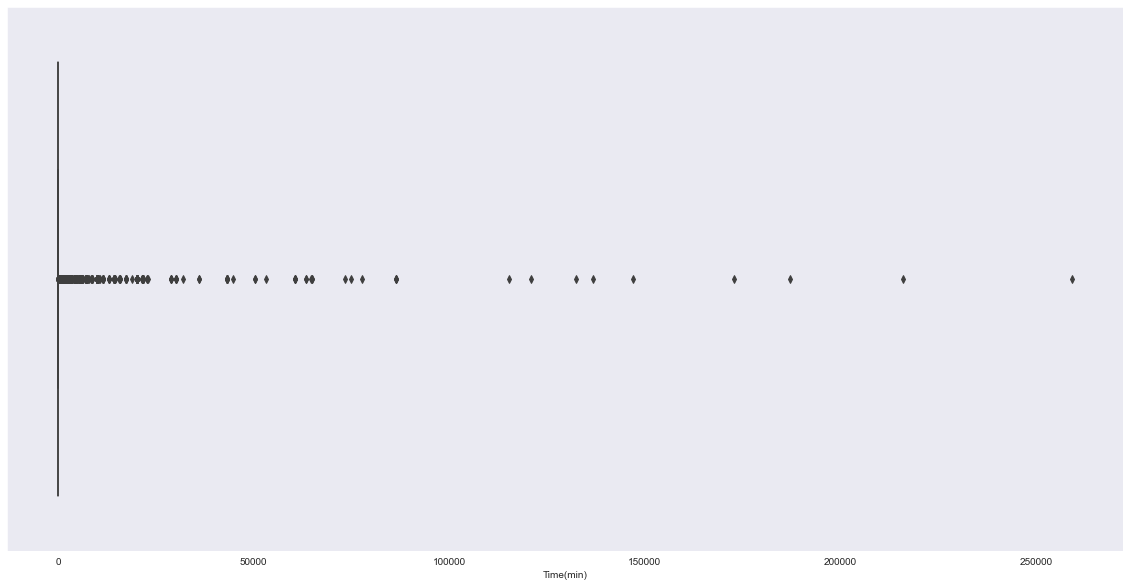

In [15]:
plt.figure(figsize=(20, 10))
sns.boxplot(new_recipes_nutrition_rates["Time(min)"]);

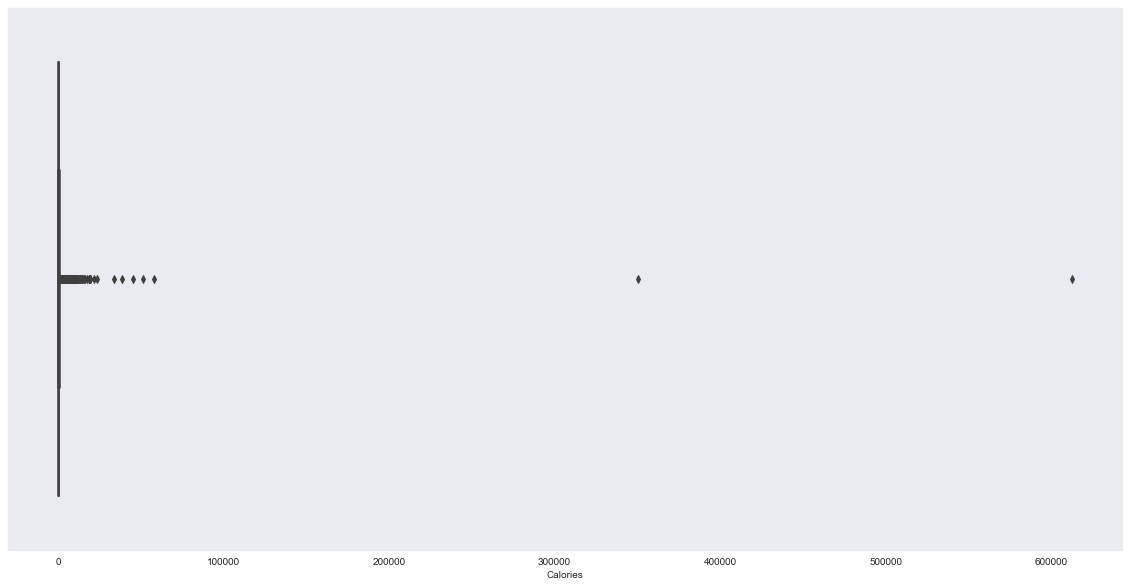

In [16]:
plt.figure(figsize=(20, 10))
sns.boxplot(new_recipes_nutrition_rates["Calories"]);

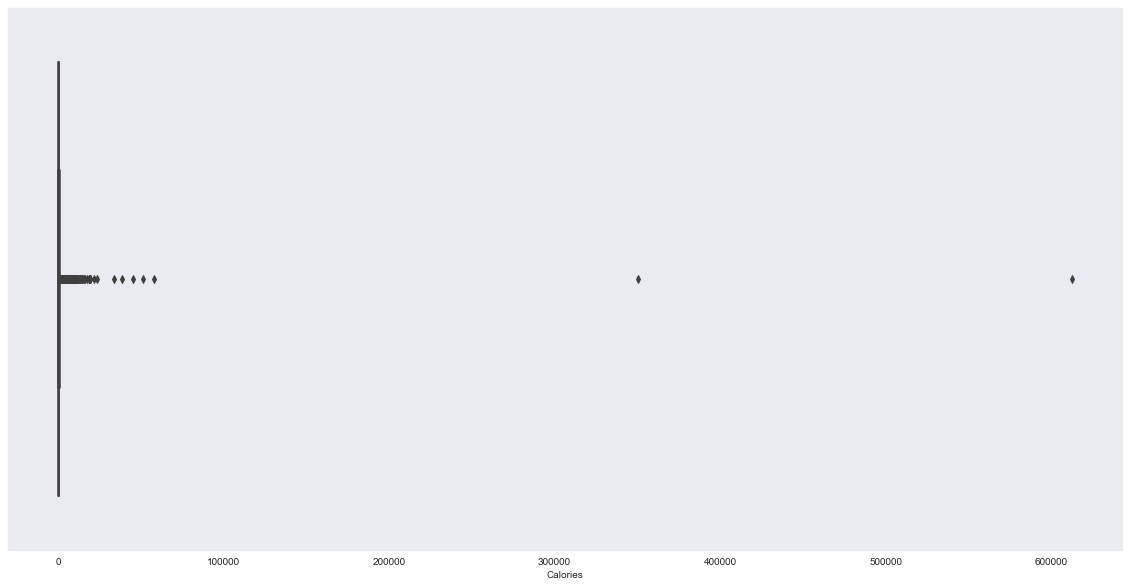

In [17]:
plt.figure(figsize=(20, 10))
sns.boxplot(new_recipes_nutrition_rates["Calories"]);

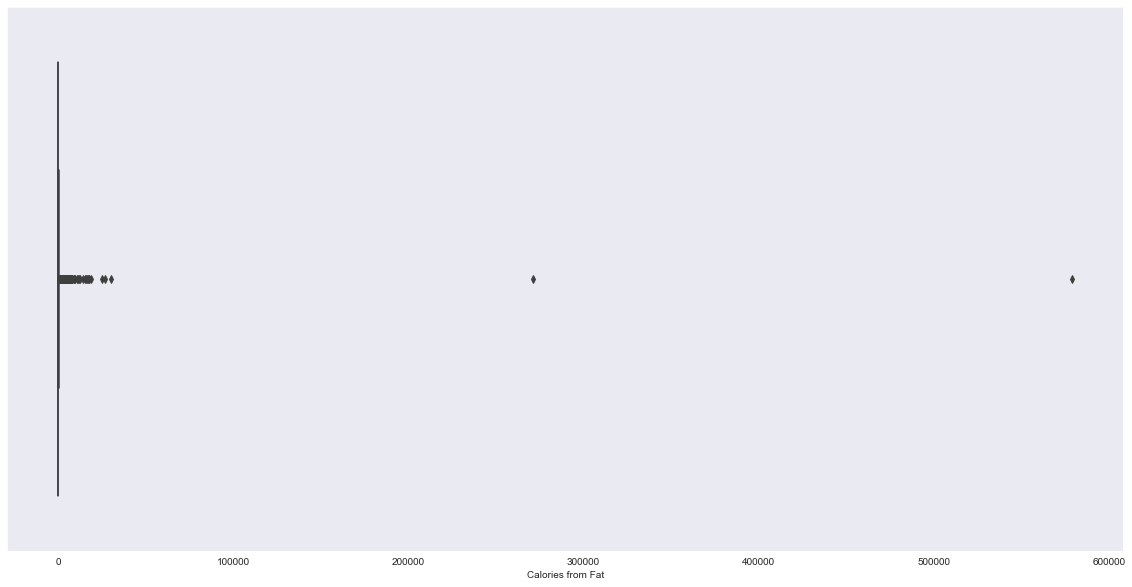

In [18]:
plt.figure(figsize=(20, 10))
sns.boxplot(new_recipes_nutrition_rates["Calories from Fat"]);

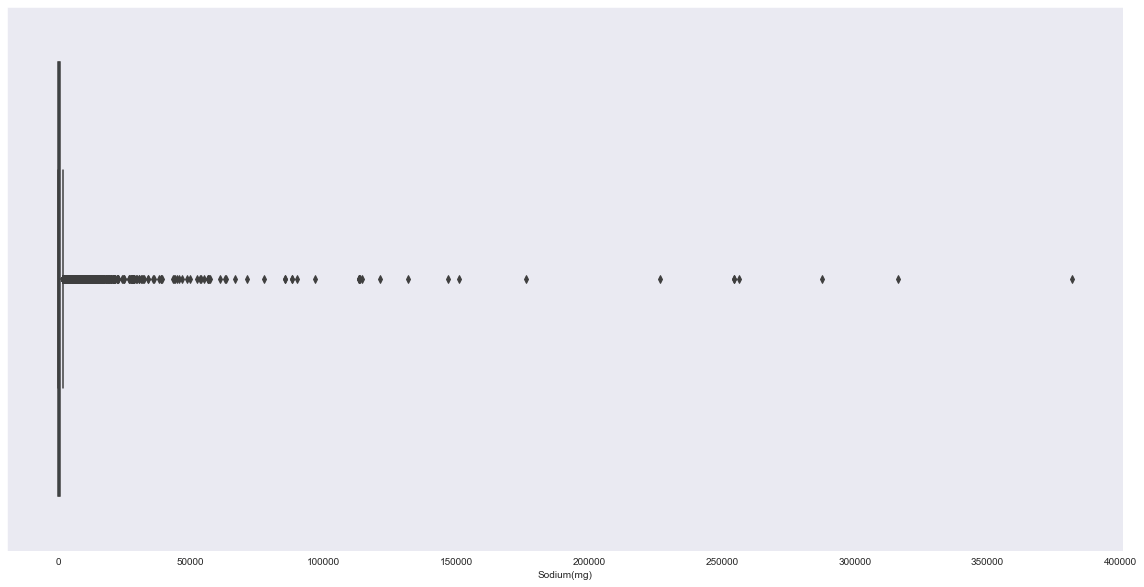

In [19]:
plt.figure(figsize=(20, 10))
sns.boxplot(new_recipes_nutrition_rates["Sodium(mg)"]);

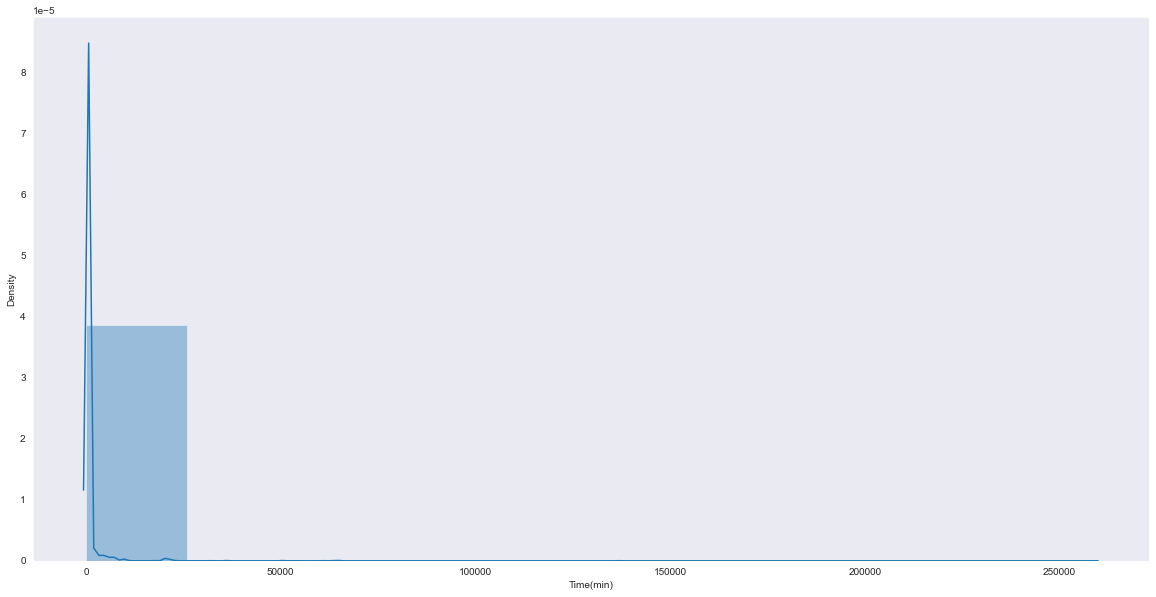

In [20]:
plt.figure(figsize=(20, 10))
sns.distplot(new_recipes_nutrition_rates["Time(min)"], bins=10);

En el anterior boxplot no se puede detectar muy bien los valores que se encuentran dentro de la caja. Para ello se realiza el calculo de los cuartiles y el rango cuartil, para luego definir el rango intercuartil. Y al igual que el boxplot, en el histograma, solo se encuentra una barra donde se encuentran la mayor parte de los datos (0-25000), y una delgada línea (densidad) que se encuentra desde 25000 hasta 260000 aprox.

In [21]:
p_25 = np.percentile(new_recipes_nutrition_rates["Time(min)"], 25)
p_50 = np.percentile(new_recipes_nutrition_rates["Time(min)"], 50)
p_75 = np.percentile(new_recipes_nutrition_rates["Time(min)"], 75)
inter_range = p_75 - p_25
minimo = p_25 - (1.5 * inter_range)
maximo = p_75 + (1.5 * inter_range)
print("Cuartil 1:", p_25, "\nCuartil 2:", p_50, "\nCuartil 3:", p_75, "\nIntercuartil Range:", inter_range,
        "\nMínimo:", minimo, "\nMáximo:", maximo)


Cuartil 1: 30.0 
Cuartil 2: 45.0 
Cuartil 3: 80.0 
Intercuartil Range: 50.0 
Mínimo: -45.0 
Máximo: 155.0


In [22]:
p_25 = np.percentile(new_recipes_nutrition_rates["Calories"], 25)
p_50 = np.percentile(new_recipes_nutrition_rates["Calories"], 50)
p_75 = np.percentile(new_recipes_nutrition_rates["Calories"], 75)
inter_range = p_75 - p_25
minimo = p_25 - (1.5 * inter_range)
maximo = p_75 + (1.5 * inter_range)
print("Cuartil 1:", p_25, "\nCuartil 2:", p_50, "\nCuartil 3:", p_75, "\nIntercuartil Range:", inter_range,
        "\nMínimo:", minimo, "\nMáximo:", maximo)

Cuartil 1: 207.8 
Cuartil 2: 358.0 
Cuartil 3: 565.6 
Intercuartil Range: 357.8 
Mínimo: -328.90000000000003 
Máximo: 1102.3000000000002


In [23]:
p_25 = np.percentile(new_recipes_nutrition_rates["Sodium(mg)"], 25)
p_50 = np.percentile(new_recipes_nutrition_rates["Sodium(mg)"], 50)
p_75 = np.percentile(new_recipes_nutrition_rates["Sodium(mg)"], 75)
inter_range = p_75 - p_25
minimo = p_25 - (1.5 * inter_range)
maximo = p_75 + (1.5 * inter_range)
print("Cuartil 1:", p_25, "\nCuartil 2:", p_50, "\nCuartil 3:", p_75, "\nIntercuartil Range:", inter_range,
        "\nMínimo:", minimo, "\nMáximo:", maximo)

Cuartil 1: 175.2 
Cuartil 2: 467.4 
Cuartil 3: 937.0 
Intercuartil Range: 761.8 
Mínimo: -967.4999999999998 
Máximo: 2079.7


De acuerto al rango intercuartil, se descartan los valores de la variable Time(min), mayores a 155 minutos.

In [24]:
new_recipes_nutrition_rates = new_recipes_nutrition_rates.drop(new_recipes_nutrition_rates[new_recipes_nutrition_rates["Time(min)"]>155].index, axis = 0)
new_recipes_nutrition_rates = new_recipes_nutrition_rates.drop(new_recipes_nutrition_rates[new_recipes_nutrition_rates["Calories"]>1080].index, axis = 0)
new_recipes_nutrition_rates = new_recipes_nutrition_rates.drop(new_recipes_nutrition_rates[new_recipes_nutrition_rates["Sodium(mg)"]>1895].index, axis = 0)
with option_context('display.max_columns', 100000):
    display(new_recipes_nutrition_rates.describe())

,Population,Mean systolic blood pressure (mmHg) Men,Mean systolic blood pressure (mmHg) Women,Mean diastolic blood pressure (mmHg) Men,Mean diastolic blood pressure (mmHg) Women,Prevalence of raised blood pressure Men,Prevalence of raised blood pressure Women,Mean BMI (urban) Men,Mean BMI (urban) Women,Mean BMI (rural) Men,Mean BMI (rural) Women,Mean total cholesterol (mmol/L) Men,Mean total cholesterol (mmol/L) Women,Mean non-HDL cholesterol (mmol/L) Men,Mean non-HDL cholesterol (mmol/L) Women,Mean HDL cholesterol (mmol/L) Men,Mean HDL cholesterol (mmol/L) Women,diabetes prevalence Men,diabetes prevalence Women,Time(min),Serving size(g),Servings per recipe,Calories,Calories from Fat,Total Fat(g),Saturated Fat(g),Cholesterol (mg),Sodium(mg),Total Carbohydrate(g),Dietary Fiber(g),Sugar(g),Protein(g)
count,7.420200e+04,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000,74202.000000
mean,2.216704e+08,126.450081,119.580899,77.859894,74.591512,0.236104,0.172890,26.210454,25.671532,25.859100,25.420083,4.752128,4.836555,3.582633,3.436436,1.179917,1.408071,0.082668,0.069229,49.982278,283.068192,6.551710,365.164120,163.715163,18.245027,6.882728,73.912308,518.931182,33.768336,3.643074,9.658360,16.957292
std,4.092188e+08,2.744559,3.393044,2.111288,2.411552,0.039740,0.039979,1.654282,1.839070,1.996163,2.062742,0.298526,0.256423,0.284548,0.239979,0.127934,0.207451,0.019735,0.028668,30.647714,380.724216,9.485412,223.990826,139.420747,15.489869,7.129969,86.835953,445.819113,28.299881,3.968558,15.182992,15.131074
min,3.273860e+05,118.063931,111.683288,71.900445,69.487188,0.142845,0.085815,21.419939,21.680372,19.756098,20.277295,3.620933,4.009896,2.418888,2.713433,0.888844,1.049927,0.051718,0.028277,13.000000,0.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.543744e+07,125.885678,117.167005,77.173219,74.058075,0.224208,0.151276,25.885019,24.684568,25.685090,24.369731,4.671216,4.753742,3.419688,3.273432,1.062087,1.208564,0.070541,0.046223,29.000000,101.000000,4.000000,193.525000,61.000000,6.800000,1.700000,7.500000,151.600000,12.400000,1.100000,2.200000,4.900000
50%,6.078914e+07,127.317829,119.965601,78.550534,74.607866,0.240700,0.175922,26.287310,25.111919,26.611790,25.238424,4.738092,4.823915,3.654045,3.397721,1.234688,1.532166,0.074589,0.060018,40.000000,209.000000,4.000000,327.900000,129.000000,14.400000,4.700000,49.900000,400.400000,26.800000,2.500000,4.800000,12.400000
75%,1.203551e+08,127.985500,122.311932,79.065779,75.527333,0.257869,0.176191,27.519394,27.056368,26.817919,26.882036,5.004125,5.064141,3.755914,3.537354,1.267908,1.576852,0.098786,0.087074,65.000000,342.000000,8.000000,497.500000,230.000000,25.600000,9.800000,108.000000,781.500000,47.400000,4.800000,10.200000,25.900000
max,1.371860e+09,134.926955,129.343699,83.617677,82.580881,0.365025,0.321920,28.669860,31.829757,29.063800,30.710866,5.117555,5.246535,4.205890,4.172991,1.457503,1.750689,0.176140,0.198158,155.000000,13176.000000,1000.000000,1080.000000,1020.000000,113.300000,70.900000,1507.300000,1894.900000,276.100000,77.500000,260.000000,181.900000


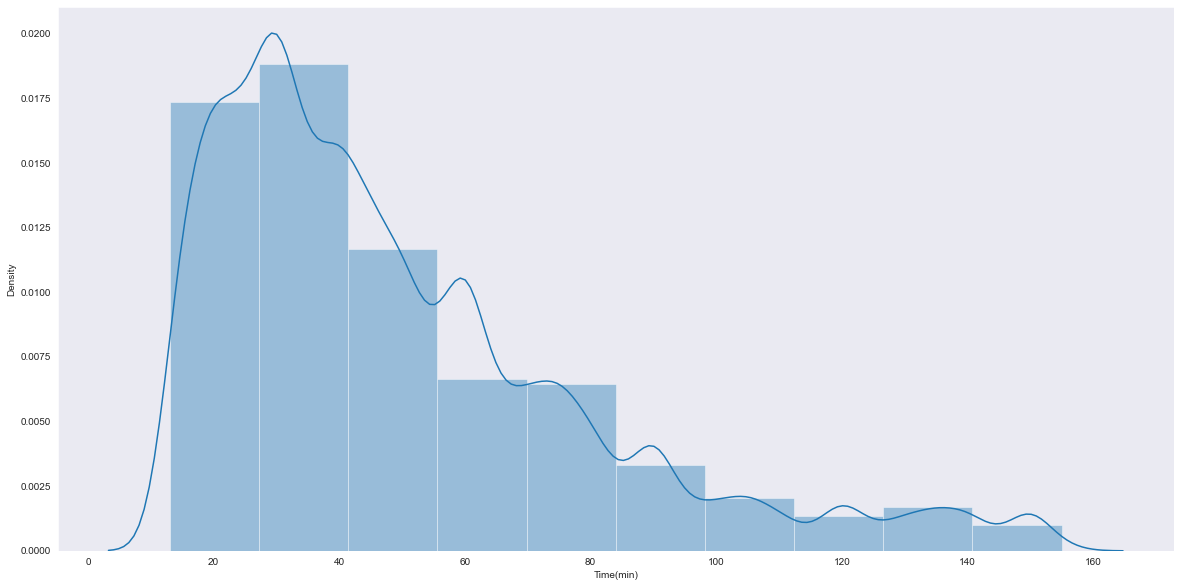

In [25]:
plt.figure(figsize=(20, 10))
sns.distplot(new_recipes_nutrition_rates["Time(min)"], bins=10);

Gracias a esa transformación la desviación de estandar de los datos para Time(min) es de 31.18 con respecto a la nueva media (50.70), por lo tanto estos no se encuentran  tan dispersados (31.18) como antes (2007.40).

Con respecto al Dataframe, 'ingredientes_by_category_recipe'. Se eliminarán algunas columnas que no son necesarias. Para las columnas con NaN values, se procederá de la siguiente forma, para la columna Category, se reemplazará los NaN con un string "Otros". Y se eliminarán aquellas columnas como proteina, calorias, carbohidratos y grasas. Ya que el anális se procederá con el valor nutritional por receta y no por ingrediente, por lo tanto el Dataframe en cuestión se unirá con el Dataframe combinado anterior

In [26]:
ingredientes_by_category_recipe.head()

,link_site,name,link,Continent,Region,adjective,Country,Ingredients_y,country_code,latitude,longitude,country,Ingredient,Category,Links,Calories per 100 g,Carbohydrates (g),Protein (g),Total Lipid (Fat) (g)
0,https://www.geniuskitchen.com/recipe/creamy-fe...,Creamy Feta Dressing,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentine,Argentina,mayonnaise,AR,-38.416097,-63.616672,Argentina,mayonnaise,Condiment,https://cosylab.iiitd.edu.in/recipedb/search_i...,361.0,0.00,0.37,40.00
1,https://www.geniuskitchen.com/recipe/creamy-fe...,Creamy Feta Dressing,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentine,Argentina,non greek yogurt,AR,-38.416097,-63.616672,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.geniuskitchen.com/recipe/creamy-fe...,Creamy Feta Dressing,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentine,Argentina,feta cheese,AR,-38.416097,-63.616672,Argentina,feta cheese,Dairy,https://cosylab.iiitd.edu.in/recipedb/search_i...,264.0,4.09,14.21,21.28
3,https://www.geniuskitchen.com/recipe/creamy-fe...,Creamy Feta Dressing,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentine,Argentina,half,AR,-38.416097,-63.616672,Argentina,half,Beverage,https://cosylab.iiitd.edu.in/recipedb/search_i...,132.0,0.00,21.47,5.11
4,https://www.geniuskitchen.com/recipe/creamy-fe...,Creamy Feta Dressing,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentine,Argentina,lemon juice,AR,-38.416097,-63.616672,Argentina,lemon juice,Beverage,https://cosylab.iiitd.edu.in/recipedb/search_i...,22.0,6.90,0.35,0.24


In [27]:
new_ingredientes_by_category_recipe = ingredientes_by_category_recipe.fillna(value={"Category":"Otros"}).drop(["link_site", "adjective", "country", "Ingredient", "Links", "Calories per 100 g", "Carbohydrates (g)", "Protein (g)", "Total Lipid (Fat) (g)"],axis=1).rename({"name":"Recipe", "Ingredients_y":"Ingredients"}, axis=1)
new_ingredientes_by_category_recipe.info()
new_ingredientes_by_category_recipe.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189667 entries, 0 to 1189666
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Recipe        1189667 non-null  object 
 1   link          1189667 non-null  object 
 2   Continent     1189667 non-null  object 
 3   Region        1189667 non-null  object 
 4   Country       1189667 non-null  object 
 5   Ingredients   1188156 non-null  object 
 6   country_code  1189667 non-null  object 
 7   latitude      1189667 non-null  float64
 8   longitude     1189667 non-null  float64
 9   Category      1189667 non-null  object 
dtypes: float64(2), object(8)
memory usage: 99.8+ MB


,Recipe,link,Continent,Region,Country,Ingredients,country_code,latitude,longitude,Category
0,Creamy Feta Dressing,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentina,mayonnaise,AR,-38.416097,-63.616672,Condiment
1,Creamy Feta Dressing,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentina,non greek yogurt,AR,-38.416097,-63.616672,Otros
2,Creamy Feta Dressing,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentina,feta cheese,AR,-38.416097,-63.616672,Dairy
3,Creamy Feta Dressing,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentina,half,AR,-38.416097,-63.616672,Beverage
4,Creamy Feta Dressing,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentina,lemon juice,AR,-38.416097,-63.616672,Beverage


In [28]:
new_position_columns = ['Recipe', 'Ingredients', 'Category', 'Time(min)', 'Serving size(g)',
       'Servings per recipe', 'Calories', 'Calories from Fat', 'Total Fat(g)', 'Saturated Fat(g)', 
       'Cholesterol (mg)', 'Sodium(mg)', 'Total Carbohydrate(g)', 'Dietary Fiber(g)', 'Sugar(g)', 
       'Protein(g)', 'country_code', 'latitude', 'longitude', 'Continent', 'Region', 'Country', 'Population',
       'Mean systolic blood pressure (mmHg) Men', 'Mean systolic blood pressure (mmHg) Women', 'Mean diastolic blood pressure (mmHg) Men',
       'Mean diastolic blood pressure (mmHg) Women', 'Prevalence of raised blood pressure Men', 'Prevalence of raised blood pressure Women', 'Mean BMI (urban) Men',
       'Mean BMI (urban) Women', 'Mean BMI (rural) Men', 'Mean BMI (rural) Women', 'Mean total cholesterol (mmol/L) Men',
       'Mean total cholesterol (mmol/L) Women', 'Mean non-HDL cholesterol (mmol/L) Men', 'Mean non-HDL cholesterol (mmol/L) Women',
       'Mean HDL cholesterol (mmol/L) Men', 'Mean HDL cholesterol (mmol/L) Women', 'diabetes prevalence Men',
       'diabetes prevalence Women']

In [29]:
df_merged_total = new_recipes_nutrition_rates.merge(new_ingredientes_by_category_recipe, on=["link", "Continent", "Region", "Country"], how="left").drop(["link", "Recipe"], axis=1).rename({"name":"Recipe"}, axis=1)
df_merged_total=df_merged_total.reindex(columns=new_position_columns)
with option_context('display.max_columns', 100000):
    display(df_merged_total)


,Recipe,Ingredients,Category,Time(min),Serving size(g),Servings per recipe,Calories,Calories from Fat,Total Fat(g),Saturated Fat(g),Cholesterol (mg),Sodium(mg),Total Carbohydrate(g),Dietary Fiber(g),Sugar(g),Protein(g),country_code,latitude,longitude,Continent,Region,Country,Population,Mean systolic blood pressure (mmHg) Men,Mean systolic blood pressure (mmHg) Women,Mean diastolic blood pressure (mmHg) Men,Mean diastolic blood pressure (mmHg) Women,Prevalence of raised blood pressure Men,Prevalence of raised blood pressure Women,Mean BMI (urban) Men,Mean BMI (urban) Women,Mean BMI (rural) Men,Mean BMI (rural) Women,Mean total cholesterol (mmol/L) Men,Mean total cholesterol (mmol/L) Women,Mean non-HDL cholesterol (mmol/L) Men,Mean non-HDL cholesterol (mmol/L) Women,Mean HDL cholesterol (mmol/L) Men,Mean HDL cholesterol (mmol/L) Women,diabetes prevalence Men,diabetes prevalence Women
0,Crushed Heirloom Potatoes,potato,Vegetable,30,285,4,465.8,267.0,29.7,6.7,15.9,313.2,42.4,6.5,2.6,10.6,AR,-38.416097,-63.616672,Latin American,South American,Argentina,42669500.0,128.32929,120.501071,79.544694,75.449334,0.279004,0.180001,27.611639,27.056368,26.650012,26.654641,4.728944,4.724748,3.654045,3.397721,1.069015,1.26926,0.098786,0.094601
1,Crushed Heirloom Potatoes,gorgonzola,Otros,30,285,4,465.8,267.0,29.7,6.7,15.9,313.2,42.4,6.5,2.6,10.6,AR,-38.416097,-63.616672,Latin American,South American,Argentina,42669500.0,128.32929,120.501071,79.544694,75.449334,0.279004,0.180001,27.611639,27.056368,26.650012,26.654641,4.728944,4.724748,3.654045,3.397721,1.069015,1.26926,0.098786,0.094601
2,Crushed Heirloom Potatoes,pecan,Nuts and Seeds,30,285,4,465.8,267.0,29.7,6.7,15.9,313.2,42.4,6.5,2.6,10.6,AR,-38.416097,-63.616672,Latin American,South American,Argentina,42669500.0,128.32929,120.501071,79.544694,75.449334,0.279004,0.180001,27.611639,27.056368,26.650012,26.654641,4.728944,4.724748,3.654045,3.397721,1.069015,1.26926,0.098786,0.094601
3,Crushed Heirloom Potatoes,extra virgin olive oil,Plant Derivative,30,285,4,465.8,267.0,29.7,6.7,15.9,313.2,42.4,6.5,2.6,10.6,AR,-38.416097,-63.616672,Latin American,South American,Argentina,42669500.0,128.32929,120.501071,79.544694,75.449334,0.279004,0.180001,27.611639,27.056368,26.650012,26.654641,4.728944,4.724748,3.654045,3.397721,1.069015,1.26926,0.098786,0.094601
4,Crushed Heirloom Potatoes,baby arugula,Otros,30,285,4,465.8,267.0,29.7,6.7,15.9,313.2,42.4,6.5,2.6,10.6,AR,-38.416097,-63.616672,Latin American,South American,Argentina,42669500.0,128.32929,120.501071,79.544694,75.449334,0.279004,0.180001,27.611639,27.056368,26.650012,26.654641,4.728944,4.724748,3.654045,3.397721,1.069015,1.26926,0.098786,0.094601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765760,Ground Beef Casserole OAMC,cream mushroom soup,Dish,45,148,12,304.5,117.0,13.0,4.4,60.5,710.2,31.5,2.1,2.7,16.3,AR,-38.416097,-63.616672,Latin American,South American,Argentina,42669500.0,128.32929,120.501071,79.544694,75.449334,0.279004,0.180001,27.611639,27.056368,26.650012,26.654641,4.728944,4.724748,3.654045,3.397721,1.069015,1.26926,0.098786,0.094601
765761,Ground Beef Casserole OAMC,pimiento,Otros,45,148,12,304.5,117.0,13.0,4.4,60.5,710.2,31.5,2.1,2.7,16.3,AR,-38.416097,-63.616672,Latin American,South American,Argentina,42669500.0,128.32929,120.501071,79.544694,75.449334,0.279004,0.180001,27.611639,27.056368,26.650012,26.654641,4.728944,4.724748,3.654045,3.397721,1.069015,1.26926,0.098786,0.094601
765762,Ground Beef Casserole OAMC,salt,Otros,45,148,12,304.5,117.0,13.0,4.4,60.5,710.2,31.5,2.1,2.7,16.3,AR,-38.416097,-63.616672,Latin American,South American,Argentina,42669500.0,128.32929,120.501071,79.544694,75.449334,0.279004,0.180001,27.611639,27.056368,26.650012,26.654641,4.728944,4.724748,3.654045,3.397721,1.069015,1.26926,0.098786,0.094601
765763,Ground Beef Casserole OAMC,pepper,Spice,45,148,12,304.5,117.0,13.0,4.4,60.5,710.

In [30]:
df_merged_total.to_csv("merget.csv")

In [31]:
df_merged_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765765 entries, 0 to 765764
Data columns (total 41 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Recipe                                      765765 non-null  object 
 1   Ingredients                                 764834 non-null  object 
 2   Category                                    765765 non-null  object 
 3   Time(min)                                   765765 non-null  int64  
 4   Serving size(g)                             765765 non-null  int64  
 5   Servings per recipe                         765765 non-null  int64  
 6   Calories                                    765765 non-null  float64
 7   Calories from Fat                           765765 non-null  float64
 8   Total Fat(g)                                765765 non-null  float64
 9   Saturated Fat(g)                            765765 non-null  float64
 

### Análisis

Se realizán los ajustes pertinentes, como un groupby,

In [32]:
ingredients_count =df_merged_total.groupby("Ingredients").count()[["Recipe"]].sort_values(by=["Recipe"], ascending=False)
df_ingredients_count = df_merged_total[df_merged_total["Ingredients"].isin(ingredients_count.index[:30])]

In [33]:
ingredients_rice =df_merged_total.groupby("Ingredients").count().reset_index()
ingredients_rice[ingredients_rice["Ingredients"]=="rice"]

,Ingredients,Recipe,Category,Time(min),Serving size(g),Servings per recipe,Calories,Calories from Fat,Total Fat(g),Saturated Fat(g),...,Mean BMI (rural) Men,Mean BMI (rural) Women,Mean total cholesterol (mmol/L) Men,Mean total cholesterol (mmol/L) Women,Mean non-HDL cholesterol (mmol/L) Men,Mean non-HDL cholesterol (mmol/L) Women,Mean HDL cholesterol (mmol/L) Men,Mean HDL cholesterol (mmol/L) Women,diabetes prevalence Men,diabetes prevalence Women
11617,rice,2119,2119,2119,2119,2119,2119,2119,2119,2119,...,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119


In [34]:
df_merged_total[df_merged_total["Category"]=="Cereal"]["Ingredients"].unique()

array(['flour', 'purpose flour', 'sesame seed', 'swiss cheese',
       'spaghetti', 'rice', 'oat', 'wheat flour', 'bread flour',
       'plain flour', 'brown rice', 'penne pasta', 'white rice',
       'self raising flour', 'grain white rice', 'arborio rice', 'pasta',
       'linguine', 'lasagna noodle', 'basmati rice'], dtype=object)

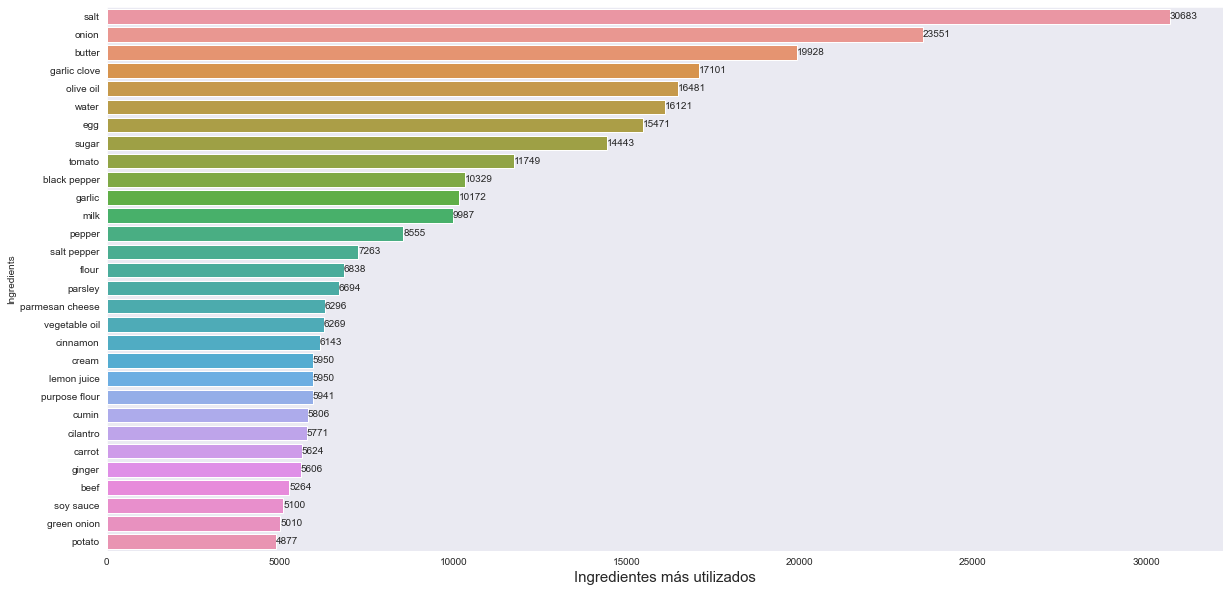

In [35]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(y='Ingredients' , data=df_ingredients_count, order = df_ingredients_count['Ingredients'].value_counts().index)

plt.xlabel("Ingredientes más utilizados", fontsize = 15)
for container in ax.containers:
    ax.bar_label(container);

La sal es el ingredientes más utilizado. Ahora para contrastar la hipotesis inicial, de que el arroz es el ingrediente más usado, la vamos a desviar a el cereal más utilizado, pero tampoco sería cierto ya que la harina es el primer inggrediente de tipo cereal.

In [36]:
df_merged_total[df_merged_total["Continent"]=="Latin American"]["Country"].unique()

array(['Argentina', 'Mexico', 'Puerto Rico', 'Jamaica', 'Cuba', 'Brazil',
       'Colombia', 'Chile', 'Peru', 'Honduras', 'Costa Rica', 'Guatemala',
       'Ecuador', 'Venezuela'], dtype=object)

In [37]:
df_merged_total.groupby("Ingredients").count()[["Recipe"]].sort_values(by=["Recipe"], ascending=False)
df_ingredients_count = df_merged_total[df_merged_total["Ingredients"].isin(ingredients_count.index[:30])]

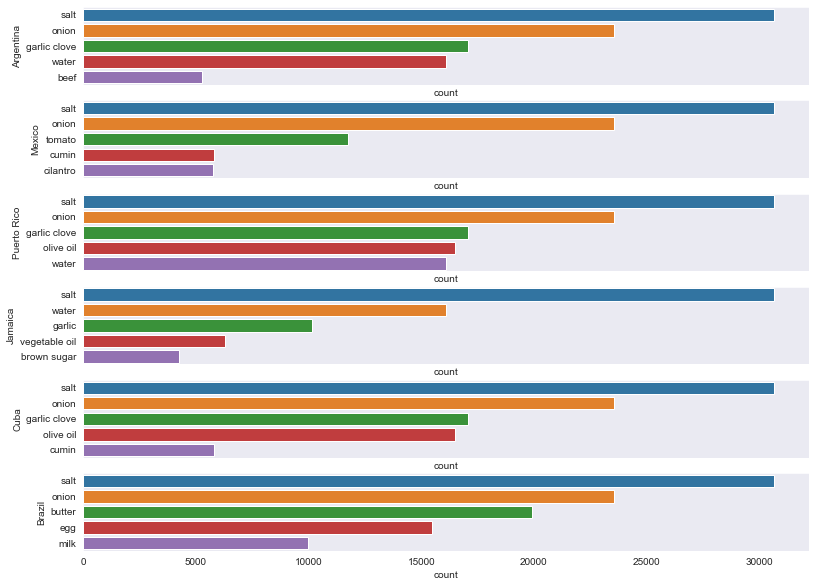

In [38]:
f, axes = plt.subplots(6, 1, figsize=(13,10), sharex=True)

data_hispa = df_merged_total[df_merged_total["Country"]=="Argentina"]
data_hispa = data_hispa.groupby("Ingredients").count()[["Recipe"]].sort_values(by=["Recipe"], ascending=False).iloc[:10]
df_data_hispa = df_merged_total[df_merged_total["Ingredients"].isin(data_hispa.index[:5])]
sns.countplot(y='Ingredients' , data=df_data_hispa, order = df_data_hispa['Ingredients'].value_counts().index, ax=axes[0])
axes[0].set_ylabel('Argentina')

data_hispa_1 = df_merged_total[df_merged_total["Country"]=="Mexico"]
data_hispa_1 = data_hispa_1.groupby("Ingredients").count()[["Recipe"]].sort_values(by=["Recipe"], ascending=False).iloc[:10]
df_data_hispa_1 = df_merged_total[df_merged_total["Ingredients"].isin(data_hispa_1.index[:5])]
sns.countplot(y='Ingredients' , data=df_data_hispa_1, order = df_data_hispa_1['Ingredients'].value_counts().index, ax=axes[1])
axes[1].set_ylabel('Mexico')

data_hispa_2 = df_merged_total[df_merged_total["Country"]=="Puerto Rico"]
data_hispa_2 = data_hispa_2.groupby("Ingredients").count()[["Recipe"]].sort_values(by=["Recipe"], ascending=False).iloc[:10]
df_data_hispa_2 = df_merged_total[df_merged_total["Ingredients"].isin(data_hispa_2.index[:5])]
sns.countplot(y='Ingredients' , data=df_data_hispa_2, order = df_data_hispa_2['Ingredients'].value_counts().index, ax=axes[2])
axes[2].set_ylabel('Puerto Rico')

data_hispa_3 = df_merged_total[df_merged_total["Country"]=="Jamaica"]
data_hispa_3 = data_hispa_3.groupby("Ingredients").count()[["Recipe"]].sort_values(by=["Recipe"], ascending=False).iloc[:10]
df_data_hispa_3 = df_merged_total[df_merged_total["Ingredients"].isin(data_hispa_3.index[:5])]
sns.countplot(y='Ingredients' , data=df_data_hispa_3, order = df_data_hispa_3['Ingredients'].value_counts().index, ax=axes[3])
axes[3].set_ylabel('Jamaica')

data_hispa_4 = df_merged_total[df_merged_total["Country"]=="Cuba"]
data_hispa_4 = data_hispa_4.groupby("Ingredients").count()[["Recipe"]].sort_values(by=["Recipe"], ascending=False).iloc[:10]
df_data_hispa_4 = df_merged_total[df_merged_total["Ingredients"].isin(data_hispa_4.index[:5])]
sns.countplot(y='Ingredients' , data=df_data_hispa_4, order = df_data_hispa_4['Ingredients'].value_counts().index, ax=axes[4])
axes[4].set_ylabel('Cuba')

data_hispa_5 = df_merged_total[df_merged_total["Country"]=="Brazil"]
data_hispa_5 = data_hispa_5.groupby("Ingredients").count()[["Recipe"]].sort_values(by=["Recipe"], ascending=False).iloc[:10]
df_data_hispa_5 = df_merged_total[df_merged_total["Ingredients"].isin(data_hispa_5.index[:5])]
sns.countplot(y='Ingredients' , data=df_data_hispa_5, order = df_data_hispa_5['Ingredients'].value_counts().index, ax=axes[5])
axes[5].set_ylabel('Brazil');


Se puede observar que la cebolla toma gran protagonismo en los paises hispanos.

In [39]:
new_recipes_nutrition_rates.merge(ingredientes_by_category_recipe, left_on="name", right_on="name", how="left")

,name,link_x,Continent_x,Region_x,Country_x,Population,Mean systolic blood pressure (mmHg) Men,Mean systolic blood pressure (mmHg) Women,Mean diastolic blood pressure (mmHg) Men,Mean diastolic blood pressure (mmHg) Women,...,latitude,longitude,country,Ingredient,Category,Links,Calories per 100 g,Carbohydrates (g),Protein (g),Total Lipid (Fat) (g)
0,Crushed Heirloom Potatoes,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentina,42669500.0,128.32929,120.501071,79.544694,75.449334,...,-38.416097,-63.616672,Argentina,potato,Vegetable,https://cosylab.iiitd.edu.in/recipedb/search_i...,77.0,17.49,2.05,0.09
1,Crushed Heirloom Potatoes,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentina,42669500.0,128.32929,120.501071,79.544694,75.449334,...,-38.416097,-63.616672,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Crushed Heirloom Potatoes,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentina,42669500.0,128.32929,120.501071,79.544694,75.449334,...,-38.416097,-63.616672,Argentina,pecan,Nuts and Seeds,https://cosylab.iiitd.edu.in/recipedb/search_i...,413.0,77.40,8.50,8.70
3,Crushed Heirloom Potatoes,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentina,42669500.0,128.32929,120.501071,79.544694,75.449334,...,-38.416097,-63.616672,Argentina,extra virgin olive oil,Plant Derivative,https://cosylab.iiitd.edu.in/recipedb/search_i...,89.0,0.00,19.80,0.50
4,Crushed Heirloom Potatoes,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentina,42669500.0,128.32929,120.501071,79.544694,75.449334,...,-38.416097,-63.616672,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808485,Ground Beef Casserole OAMC,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentina,42669500.0,128.32929,120.501071,79.544694,75.449334,...,-38.416097,-63.616672,Argentina,cream mushroom soup,Dish,https://cosylab.iiitd.edu.in/recipedb/search_i...,89.0,6.45,1.61,6.45
808486,Ground Beef Casserole OAMC,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentina,42669500.0,128.32929,120.501071,79.544694,75.449334,...,-38.416097,-63.616672,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN
808487,Ground Beef Casserole OAMC,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentina,42669500.0,128.32929,120.501071,79.544694,75.449334,...,-38.416097,-63.616672,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN
808488,Ground Beef Casserole OAMC,https://cosylab.iiitd.edu.in/recipedb/search_r...,Latin American,South American,Argentina,42669500.0,128.32929,120.501071,79.544694,75.449334,...,-38.416097,-63.616672,Argentina,pepper,Spice,https://cosylab.iiitd.edu.in/recipedb/search_i...,20.0,4.64,0.86,0.17


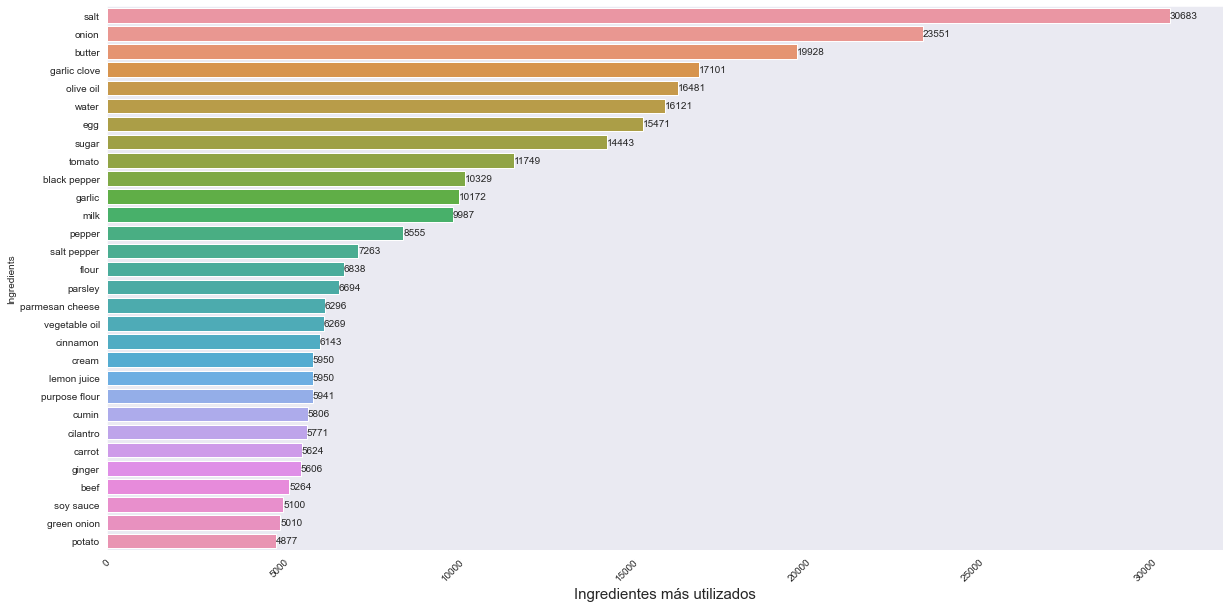

In [40]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(y='Ingredients' , data=df_ingredients_count, order = df_ingredients_count['Ingredients'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel("Ingredientes más utilizados", fontsize = 15)
for container in ax.containers:
    ax.bar_label(container);

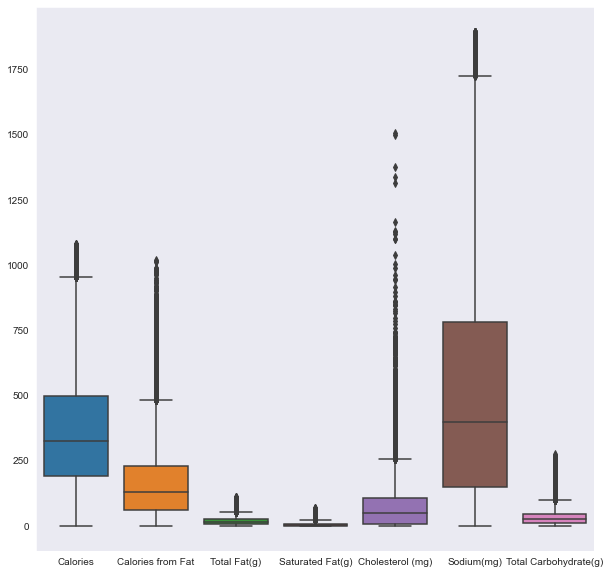

In [41]:
Value_nt = df_merged_total.groupby(["Recipe"]).mean()[["Calories", 'Calories from Fat', 'Total Fat(g)', 'Saturated Fat(g)', 'Cholesterol (mg)', 'Sodium(mg)', 'Total Carbohydrate(g)']]
plt.figure(figsize=(10,10))
sns.boxplot(data=Value_nt);


Se puede observar que incluso después de la limpieza, siguen habiendo datos fuera del rango intercuartil o outliers.

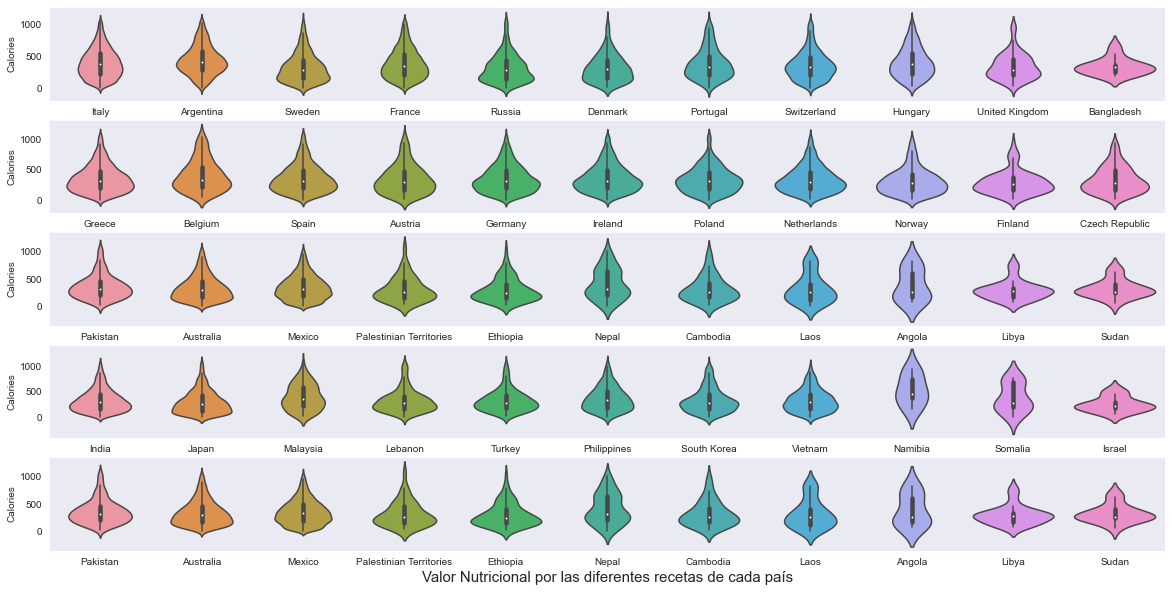

In [42]:
value_nutition_1 = df_merged_total.groupby(["Recipe", "Country"]).mean().sort_values(by=["Calories"], ascending=False).reset_index()
value_nutition_1 = value_nutition_1[value_nutition_1["Country"].isin(['Argentina', 'France', 'Russia', 'Denmark', 'Switzerland',
       'Portugal', 'Italy', 'United Kingdom', 'Hungary', 'Sweden' , 'Bangladesh'])]

value_nutition_2 = df_merged_total.groupby(["Recipe", "Country"]).mean().sort_values(by=["Calories"], ascending=False).reset_index()
value_nutition_2 = value_nutition_2[value_nutition_2["Country"].isin(['Belgium', 'Norway', 'Austria', 'Greece', 'Poland', 'Netherlands',
       'Ireland', 'Germany', 'Spain', 'Finland', 'Czech Republic'])]

value_nutition_3 = df_merged_total.groupby(["Recipe", "Country"]).mean().sort_values(by=["Calories"], ascending=False).reset_index()
value_nutition_3 = value_nutition_3[value_nutition_3["Country"].isin(['Angola', 'Libya', 'Sudan', 'Pakistan', 'Ethiopia',
       'Australia', 'Laos', 'Mexico', 'Nepal', 'Cambodia',
       'Palestinian Territories'])]

value_nutition_4 = df_merged_total.groupby(["Recipe", "Country"]).mean().sort_values(by=["Calories"], ascending=False).reset_index()
value_nutition_4 = value_nutition_4[value_nutition_4["Country"].isin(['Vietnam', 'Israel', 'Lebanon', 'Philippines',
       'India', 'South Korea', 'Somalia', 'Namibia', 'Malaysia', 'Turkey',
       'Japan'])]

value_nutition_5 = df_merged_total.groupby(["Recipe", "Country"]).mean().sort_values(by=["Calories"], ascending=False).reset_index()
value_nutition_5 = value_nutition_5[value_nutition_5["Country"].isin(['Angola', 'Libya', 'Sudan', 'Pakistan', 'Ethiopia',
       'Australia', 'Laos', 'Mexico', 'Nepal', 'Cambodia',
       'Palestinian Territories'])]


value_nutition_6 = df_merged_total.groupby(["Recipe", "Country"]).mean().sort_values(by=["Calories"], ascending=False).reset_index()
value_nutition_6 = value_nutition_6[value_nutition_6["Country"].isin(['Saudi Arabia', 'Mongolia', 'Iraq',
       'New Zealand', 'Puerto Rico', 'Jamaica', 'Cuba', 'Brazil',
       'Colombia', 'Chile', 'Peru'])]

f, axes = plt.subplots(5, 1, figsize=(20,10), sharex=False)

sns.violinplot(x="Country", y = "Calories", data=value_nutition_1, ax=axes[0])
sns.violinplot(x="Country", y = "Calories", data=value_nutition_2, ax=axes[1])
sns.violinplot(x="Country", y = "Calories", data=value_nutition_3, ax=axes[2])
sns.violinplot(x="Country", y = "Calories", data=value_nutition_4, ax=axes[3])
sns.violinplot(x="Country", y = "Calories", data=value_nutition_5, ax=axes[4])
plt.xlabel("Valor Nutricional por las diferentes recetas de cada país", fontsize = 15);

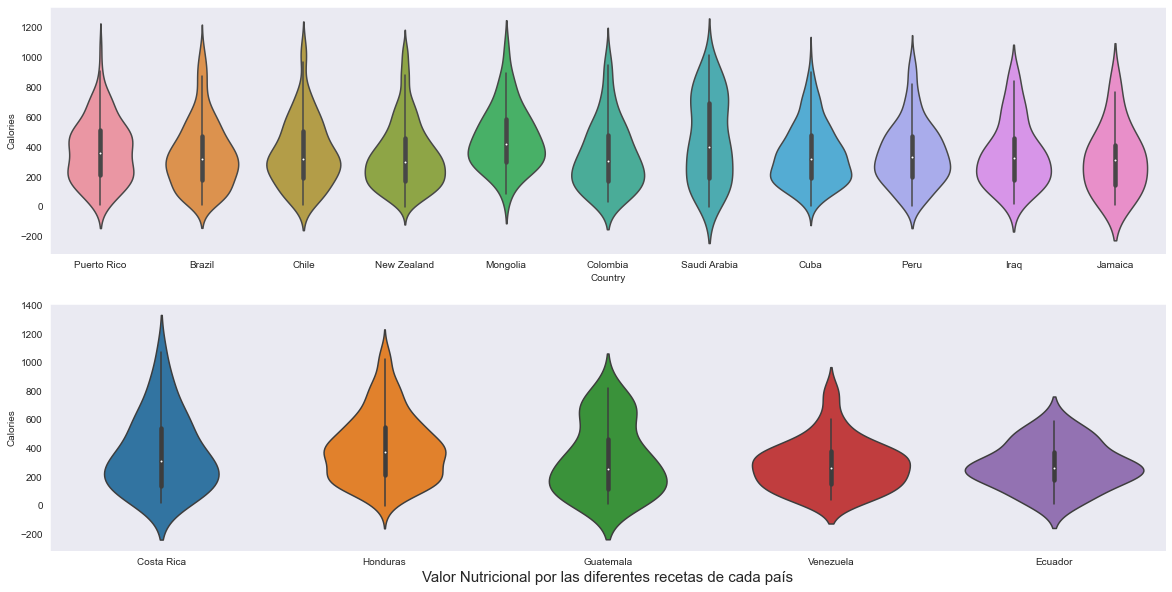

In [43]:
value_nutition_6 = df_merged_total.groupby(["Recipe", "Country"]).mean().sort_values(by=["Calories"], ascending=False).reset_index()
value_nutition_6 = value_nutition_6[value_nutition_6["Country"].isin(['Saudi Arabia', 'Mongolia', 'Iraq',
       'New Zealand', 'Puerto Rico', 'Jamaica', 'Cuba', 'Brazil',
       'Colombia', 'Chile', 'Peru'])]

value_nutition_7 = df_merged_total.groupby(["Recipe", "Country"]).mean().sort_values(by=["Calories"], ascending=False).reset_index()
value_nutition_7 = value_nutition_7[value_nutition_7["Country"].isin(['Honduras', 'Costa Rica', 'Guatemala',
        'Ecuador', 'Venezuela'])]
f, axes = plt.subplots(2, 1, figsize=(20,10), sharex=False)

sns.violinplot(x="Country", y = "Calories", data=value_nutition_6, ax=axes[0])
sns.violinplot(x="Country", y = "Calories", data=value_nutition_7, ax=axes[1])

plt.xlabel("Valor Nutricional por las diferentes recetas de cada país", fontsize = 15);

Las calories de las diferentes recetas por país no sobrepasan de las 2000 calorias, por otro lado la concentración de los valores se encuentra entre 200 y 400 calorias.

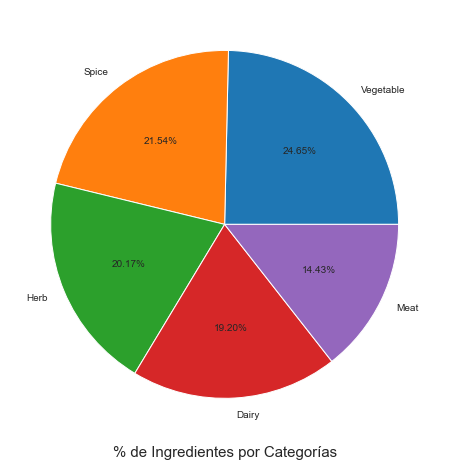

In [44]:
pie_chart_categories =df_merged_total.groupby("Category").count()[["Recipe"]].sort_values(by=["Recipe"], ascending=False).iloc[1:6]
plt.figure(figsize=(8,8))
plt.pie(pie_chart_categories.Recipe.values,
        labels=pie_chart_categories.index,
        autopct='%1.2f%%')
p=plt.gcf()
plt.xlabel("% de Ingredientes por Categorías", fontsize = 15);

El mayor porcentaje de utilización de ingredientes por categoria son los vegetales.

In [45]:
pie_chart_categoriesd =df_merged_total.groupby("Category").count()
pie_chart_categoriesd

,Recipe,Ingredients,Time(min),Serving size(g),Servings per recipe,Calories,Calories from Fat,Total Fat(g),Saturated Fat(g),Cholesterol (mg),...,Mean BMI (rural) Men,Mean BMI (rural) Women,Mean total cholesterol (mmol/L) Men,Mean total cholesterol (mmol/L) Women,Mean non-HDL cholesterol (mmol/L) Men,Mean non-HDL cholesterol (mmol/L) Women,Mean HDL cholesterol (mmol/L) Men,Mean HDL cholesterol (mmol/L) Women,diabetes prevalence Men,diabetes prevalence Women
Category,,,,,,,,,,,,,,,,,,,,,
Additive,37545,37545,37545,37545,37545,37545,37545,37545,37545,37545,...,37545,37545,37545,37545,37545,37545,37545,37545,37545,37545
Bakery,9109,9109,9109,9109,9109,9109,9109,9109,9109,9109,...,9109,9109,9109,9109,9109,9109,9109,9109,9109,9109
Beverage,13656,13656,13656,13656,13656,13656,13656,13656,13656,13656,...,13656,13656,13656,13656,13656,13656,13656,13656,13656,13656
Beverage-Alcoholic,8065,8065,8065,8065,8065,8065,8065,8065,8065,8065,...,8065,8065,8065,8065,8065,8065,8065,8065,8065,8065
Cereal,24103,24103,24103,24103,24103,24103,24103,24103,24103,24103,...,24103,24103,24103,24103,24103,24103,24103,24103,24103,24103
Condiment,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,...,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441
Dairy,62379,62379,62379,62379,62379,62379,62379,62379,62379,62379,...,62379,62379,62379,62379,62379,62379,62379,62379,62379,62379
Dish,4289,4289,4289,4289,4289,4289,4289,4289,4289,4289,...,4289,4289,4289,4289,4289,4289,4289,4289,4289,4289
Essential Oil,4088,4088,4088,4088,4088,4088,4088,4088,4088,4088,...,4088,4088,4088,4088,4088,4088,4088,4088,4088,4088


Se puede observar un correlación positiva entre Saturated Fat, Cholesterol con la media de colesterol HDL o colesterol bueno tanto en mujeres como en hombres, este ayuda a transportar el colesterol a diferentes partes del cuerpo. La Fibra tiena una correlación negativa con la media de colesterol no HDL.

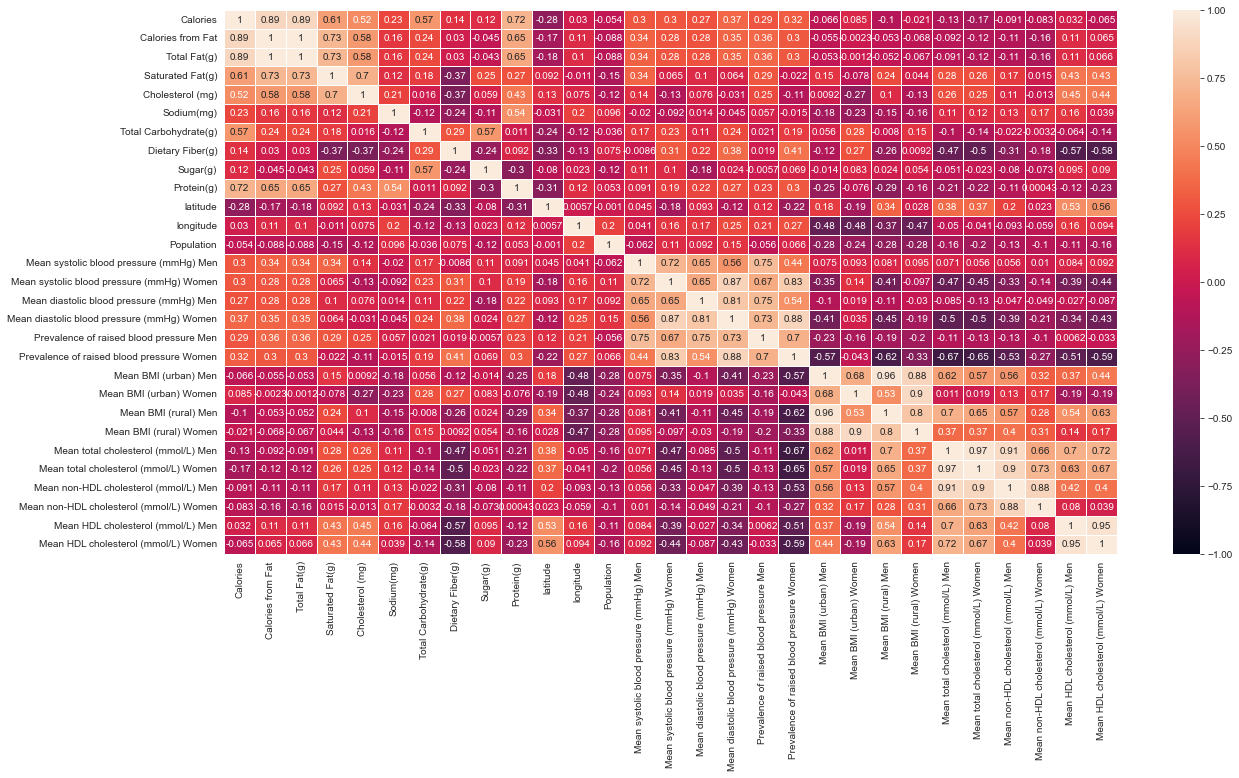

In [46]:
correlacion =df_merged_total.groupby("Country").mean().loc[:,'Calories': 'Mean HDL cholesterol (mmol/L) Women']
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(correlacion.corr(),
            annot=True,
            linewidths=.5,
            ax=ax,
            vmin=-1,
            vmax=1);

In [47]:
a = df_merged_total.groupby("Country").mean()
a

,Time(min),Serving size(g),Servings per recipe,Calories,Calories from Fat,Total Fat(g),Saturated Fat(g),Cholesterol (mg),Sodium(mg),Total Carbohydrate(g),...,Mean BMI (rural) Men,Mean BMI (rural) Women,Mean total cholesterol (mmol/L) Men,Mean total cholesterol (mmol/L) Women,Mean non-HDL cholesterol (mmol/L) Men,Mean non-HDL cholesterol (mmol/L) Women,Mean HDL cholesterol (mmol/L) Men,Mean HDL cholesterol (mmol/L) Women,diabetes prevalence Men,diabetes prevalence Women
Country,,,,,,,,,,,,,,,,,,,,,
Angola,59.465753,288.767123,4.698630,438.442466,205.849315,22.946575,8.880822,78.731507,624.971233,44.801370,...,21.874807,23.110562,4.004614,4.221855,2.799645,2.888915,1.065813,1.214857,0.085194,0.078255
Argentina,60.743460,344.349107,6.066882,457.703554,225.634853,25.124757,9.713600,90.922420,711.124295,30.315472,...,26.650012,26.654641,4.728944,4.724748,3.654045,3.397721,1.069015,1.269260,0.098786,0.094601
Australia,46.757797,320.391058,5.930023,368.863501,168.340371,18.770919,7.275839,81.926049,395.290588,34.885854,...,27.781611,27.147317,4.759317,4.811948,3.462276,3.239115,1.280909,1.576852,0.067892,0.049997
Austria,58.001852,322.287963,7.784722,373.526759,170.220000,18.965231,8.471852,100.134722,310.218981,38.256667,...,26.817919,24.542449,5.053876,5.015970,3.854646,3.545588,1.351118,1.638238,0.054147,0.032164
Bangladesh,68.959799,0.000000,6.512563,348.884925,157.859296,17.539698,4.929146,122.006030,334.052764,27.955779,...,20.892296,21.250132,4.123427,4.286002,3.079749,3.192357,1.061773,1.143405,0.102543,0.092910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkey,55.184537,297.599745,5.816099,347.376233,161.360611,17.974706,5.540312,55.882596,394.542030,34.321254,...,26.639710,28.502497,4.511022,4.684229,3.401006,3.394812,1.110307,1.285648,0.130452,0.141697
United Kingdom,67.832994,52.956212,8.428717,374.884521,167.573320,18.633605,7.681874,68.197760,440.934725,39.752749,...,27.342600,26.603571,4.896516,4.997179,3.566167,3.383798,1.357141,1.633686,0.066201,0.049460
United States of America,61.035461,0.000000,10.608927,360.337107,167.971878,18.745306,7.000155,76.537777,601.945152,31.943622,...,29.063800,29.228162,4.667460,4.753742,3.439104,3.273432,1.244595,1.522840,0.081697,0.064363


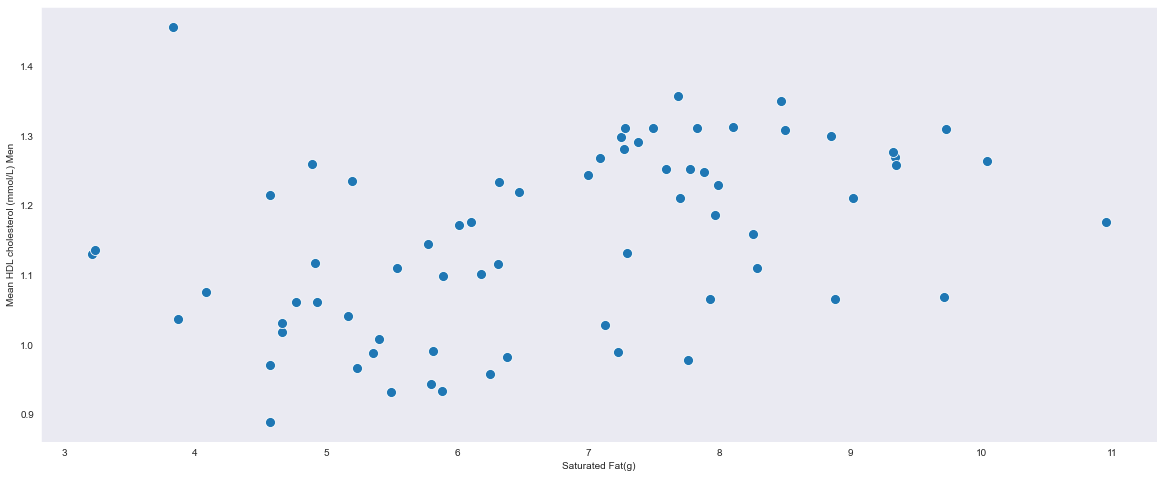

In [48]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=a['Saturated Fat(g)'],
                y=a['Mean HDL cholesterol (mmol/L) Men'],     
               s=100);

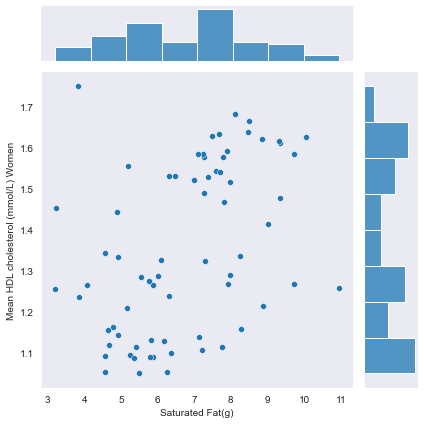

In [49]:
sns.jointplot(x= "Saturated Fat(g)", y = "Mean HDL cholesterol (mmol/L) Women", data=a);

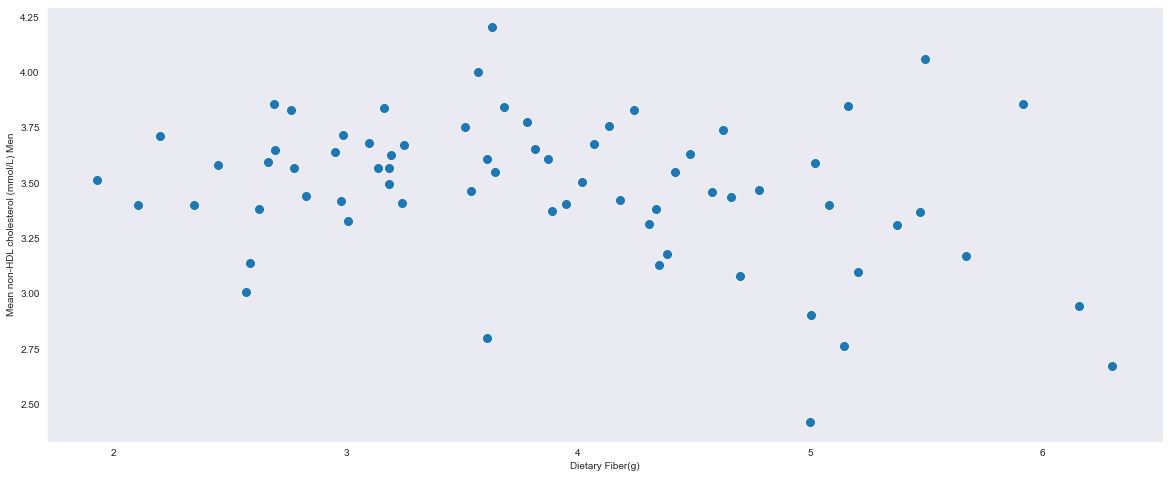

In [50]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=a['Dietary Fiber(g)'],
                y=a['Mean non-HDL cholesterol (mmol/L) Men'],     
               s=100);

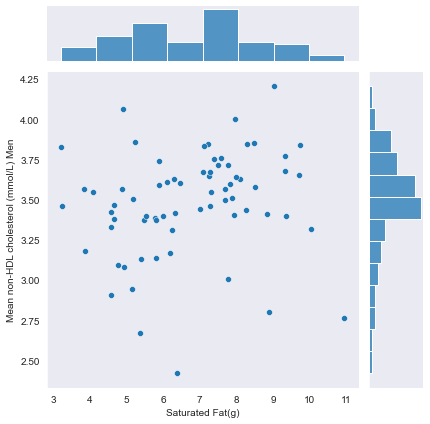

In [51]:

sns.jointplot(x= "Saturated Fat(g)", y = "Mean non-HDL cholesterol (mmol/L) Men", data=a);

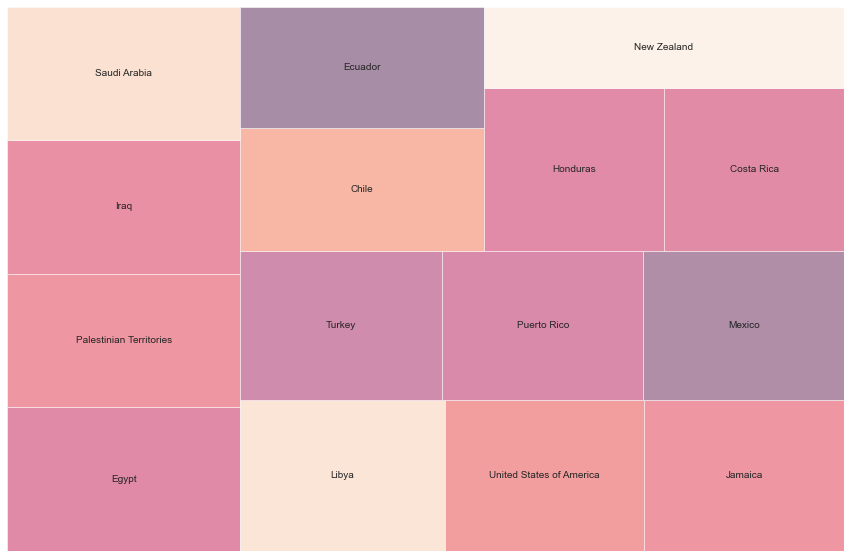

In [52]:


data = df_merged_total.groupby("Country").mean()['Mean BMI (urban) Women'].sort_values(ascending=False)[:15]
plt.figure(figsize=(15,10))
squarify.plot(sizes=data.values, label=data.index, alpha=.5 )
plt.axis('off')
plt.show()

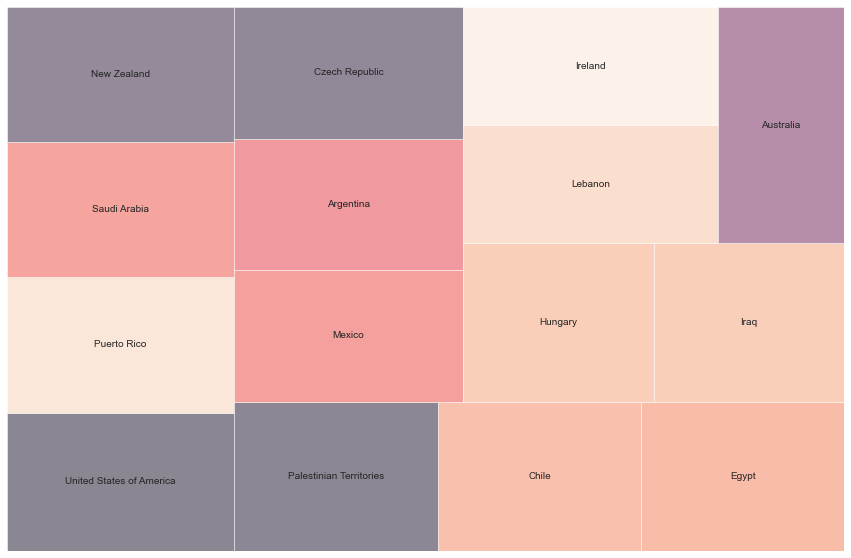

In [53]:


data = df_merged_total.groupby("Country").mean()['Mean BMI (urban) Men'].sort_values(ascending=False)[:15]
plt.figure(figsize=(15,10))
squarify.plot(sizes=data.values, label=data.index, alpha=.5 )
plt.axis('off')
plt.show()

Por último, Estados Unidos cuenta con el nivel mas alto de media en hombres de Indice de Masa Corporal, que es de 28, que indica sobrepeso. Mientra que en el caso de las mujeres el país con mayor promedio de IMC es Egipto.

In [54]:
data = df_merged_total.groupby("Country").mean()['Mean BMI (urban) Men'].sort_values(ascending=False)[:15]
data

Country
United States of America    28.669860
Puerto Rico                 28.213270
Saudi Arabia                28.019820
New Zealand                 27.919060
Palestinian Territories     27.872420
Chile                       27.809457
Egypt                       27.732238
Mexico                      27.663920
Argentina                   27.611639
Czech Republic              27.609921
Hungary                     27.604858
Iraq                        27.601130
Lebanon                     27.519750
Ireland                     27.519394
Australia                   27.388985
Name: Mean BMI (urban) Men, dtype: float64

Con respecto a las hipotesis planteadas,
- El arroz es el ingrediente más usado en las prepaciones de las diferentes cocinas en estudio con respecto al resto de los ingredientes. 
- Las cocinas de los países hispanos tienen una alta relación. Es decir, comparten ingredientes en sus preparaciones, siendo el totame y la cebolla los más usados.
- Estados Unidos es el páis con mayor media de IMC (Índice de Masa Corporal) y, tiene una correlación positiva con los componentes del valor nutricional de las recetas (Grasas, Colesterol, Sodio, Azúcar, etc.)

- El cereal más usado es la harina y no el arroz.
- Además de las sal, que es algo comprensible. La cebolla se comparte en la mayoría de las cocinas latinas.
- Estados Unidos si es el país con mayor IMC en los hombre, mientras que el país con mayor IMC es Egipto. Existe una correlación negativa entre la fibra y el colesterol Non DHL, y una correlación positiva entre la grasa saturada y el colesterol DHL o bueno